# <center><span style="font-family: Arial; font-weight:bold;font-size:2.5em;color:#008080;">Supervised Learning Project</center>

### Current library packages version:

    numpy - 1.25.0
    pandas - 2.0.2
    scikit-learn - 1.2.2
    scipy - 1.10.1
    seaborn - 0.12.2
    matplotlib - 3.7.1
    statsmodels - 0.14.0

### Importing all the necessary Libraries

In [1]:
import warnings
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore, randint
%matplotlib inline

from scipy.stats import reciprocal, uniform
from scipy.stats import zscore
import statsmodels.formula.api as smf

from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, roc_curve, auc, precision_score, f1_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# <center><span style="font-family: Arial; font-weight:bold;font-size:2.2em;color:#FFA500">PART - 1</center>

<span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#708090"> `DOMAIN`: Medical.

    
<span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#708090"> `CONTEXT`: Medical research university X is undergoing a deep research on patients with certain conditions. University has an internal AI team. Due to confidentiality the patient’s details and the conditions are masked by the client by providing different datasets to the AI team for developing a AIML model which can predict the condition of the patient depending on the received test results. 

    
<span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#708090"> `DATA DESCRIPTION`: The data consists of biomechanics features of the patients according to their current conditions. Each patient is represented in the data set by six biomechanics attributes derived from the shape and orientation of the condition to their body part.

<span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#708090"> `DATA DICTIONARY`:   
1. `P_tilt`: It represents the pelvic tilt, which is the angle of the pelvis with respect to the vertical axis. It indicates the forward or backward tilt of the pelvis.
2. `L_angle`: It denotes the lumbar lordosis angle, which is the angle formed by the curve of the lower spine (lumbar region) and the vertical axis. It provides information about the curvature of the lower back.
3. `S_slope`: It refers to the sacral slope, which is the angle between the horizontal plane and the sacrum (the triangular bone at the base of the spine). It indicates the orientation of the sacrum.
4. `P_incidence`: This feature represents the pelvic incidence, which is the angle between a line perpendicular to the sacral plate and a line connecting the midpoint of the sacral plate to the femoral head axis. It is measured in degrees.    
5. `P_radius`: It represents the pelvic radius, which is the distance between the center of the circle fitted to the pelvic contour and the midpoint of the sacral plate. It provides information about the shape of the pelvis.
6. `S_Degree`: It denotes the degree of spondylolisthesis, which is the displacement of one vertebra in relation to the adjacent vertebrae. It indicates the severity of spinal misalignment.
7. `Class`: It is the target variable or the class label that represents the condition of the patient. It indicates whether the patient belongs to a specific class or category based on the biomechanics features.    
    
<span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#708090"> `PROJECT OBJECTIVE`: To Demonstrate the ability to fetch, process and leverage data to generate useful predictions by training Supervised Learning algorithms.

### <span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;">1. Data Understanding

### Part 1. 1 a - Read all the 3 CSV files as DataFrame and store them into 3 separate variables.

In [4]:
df1=pd.read_csv('/Users/parinparmar/Desktop/Great Learning/AI-ML /Supervised Learning (3)/SUPERVISED LEARNING - PROJECT/Normal.csv')
df2=pd.read_csv('/Users/parinparmar/Desktop/Great Learning/AI-ML /Supervised Learning (3)/SUPERVISED LEARNING - PROJECT/Type_H.csv')
df3=pd.read_csv('/Users/parinparmar/Desktop/Great Learning/AI-ML /Supervised Learning (3)/SUPERVISED LEARNING - PROJECT/Type_S.csv')

### Part 1.1 b - Print Shape and columns of all the 3 DataFrames

In [3]:
# Print shape of each DataFrame
print("Shape of df1:", df1.shape)
print("Shape of df2:", df2.shape)
print("Shape of df3:", df3.shape)

# Print columns of each DataFrame
print("Columns of df1:", df1.columns)
print("Columns of df2:", df2.columns)
print("Columns of df3:", df3.columns)

Shape of df1: (100, 7)
Shape of df2: (60, 7)
Shape of df3: (150, 7)
Columns of df1: Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')
Columns of df2: Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')
Columns of df3: Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')


### Part 1.1 c - Compare Column names of all the 3 DataFrames and clearly write observations

In [4]:
column_names_df1 = df1.columns
column_names_df2 = df2.columns
column_names_df3 = df3.columns

column_names_equal = all(column_names_df1 == column_names_df2) and all(column_names_df2 == column_names_df3)

if column_names_equal:
    print("All DataFrames have the same column names.")
else:
    print("DataFrames have different column names.")

All DataFrames have the same column names.


### Part 1.1 d - Print DataTypes of all the 3 DataFrames.

In [5]:
print("Data Types of df1:", df1.dtypes)
print()

print("Data Types of df2:", df2.dtypes)
print()

print("Data Types of df3:", df3.dtypes)

Data Types of df1: P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

Data Types of df2: P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

Data Types of df3: P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object


#### Observations:-

* The columns `P_incidence`, `P_tilt`, `L_angle`, `S_slope`, `P_radius`, and `S_Degree` have data type float64. This suggests that these columns likely contain numerical values with decimal precision.
* The column `Class` has data type object, which typically represents string or categorical data. In this case, it suggests that the Class column may contain categorical labels or class names.
* The data types of the columns in df1 indicate that it is a dataset with numerical features (float64) and a target variable or class labels (object). The numerical features are likely continuous or continuous-like variables, while the Class column represents discrete categories.

### Part 1.1 e - Observe and share variation in ‘Class’ feature of all the 3 DaraFrames

In [6]:
class_var_df1 = df1['Class'].value_counts()
class_var_df2 = df2['Class'].value_counts()
class_var_df3 = df3['Class'].value_counts()

print("Class variation in df1:")
print(class_var_df1)

print("\nClass variation in df2:")
print(class_var_df2)

print("\nClass variation in df3:")
print(class_var_df3,"\n")

Class variation in df1:
Class
Normal    73
Nrmal     27
Name: count, dtype: int64

Class variation in df2:
Class
Type_H    37
type_h    23
Name: count, dtype: int64

Class variation in df3:
Class
Type_S    133
tp_s       17
Name: count, dtype: int64 



### <span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;">2. Data Preparation and Exploration

### Part 1.2 a - Unify all the variations in ‘Class’ feature for all the 3 DataFrames.

In [7]:
# Identifying unique variations in 'Class' for each DataFrame
normal_var = df1['Class'].unique()
type_h_var = df2['Class'].unique()
type_s_var = df3['Class'].unique()

print(normal_var)
print()
print(type_h_var)
print()
print(type_s_var)

['Normal' 'Nrmal']

['Type_H' 'type_h']

['Type_S' 'tp_s']


In [8]:
# Defining a mapping to unify the variations
mapping = {
    'Normal': 'normal',
    'Nrmal': 'normal',
}
mapping2 = {
    'Type_H': 'type_h'
}
mapping3 = {
    'Type_S': 'type_s',
    'tp_s': 'type_s'
}

# Applying the mapping to update 'Class' values in each DataFrame
df1['Class'] = df1['Class'].map(mapping)
df2['Class'] = df2['Class'].map(mapping2)
df3['Class'] = df3['Class'].map(mapping3)

Therefore we have unified all the variations in ‘Class’ feature for all the 3 DataFrames.

### Part 1.2 b - Combine all the 3 DataFrames to form a single DataFrame

In [9]:
# Combining or concatenating the dataframes row-wise
df_comb = pd.concat([df1, df2, df3], ignore_index=True)

#Reset the index of the combined DataFrame
df_comb.reset_index(drop=True, inplace=True)

In [10]:
# checking the shape of the data
df_comb.shape

(310, 7)

As we can notice that the DataFrames have been combined appropriately.

### Part 1.2 c - Print 5 random samples of this DataFrame

In [11]:
df_comb.sample(n=5)

P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree  \
222    80.074914  48.069531  52.403439  32.005383  110.709912  67.727316   
294    72.643850  18.929117  68.000000  53.714733  116.963416  25.384247   
0      38.505273  16.964297  35.112814  21.540976  127.632875   7.986683   
92     54.600316  21.488974  29.360216  33.111342  118.343321  -1.471067   
203    49.782121   6.466805  53.000000  43.315316  110.864783  25.335647   

      Class  
222  type_s  
294  type_s  
0    normal  
92   normal  
203  type_s

### Part 1.2 d - Print Feature-wise percentage of Null values

In [12]:
null_percentage = (df_comb.isnull().sum() / len(df_comb)) * 100

# Print the feature-wise percentage of null values
print(null_percentage)

P_incidence    0.000000
P_tilt         0.000000
L_angle        0.000000
S_slope        0.000000
P_radius       0.000000
S_Degree       0.000000
Class          7.419355
dtype: float64


We notice that 7.419355% of the values in the column 'Class' are missing.

### Part 1.2 e - Check 5-point summary of the new DataFrame

In [13]:
df_comb.describe().T

count        mean        std        min         25%         50%  \
P_incidence  310.0   60.496653  17.236520  26.147921   46.430294   58.691038   
P_tilt       310.0   17.542822  10.008330  -6.554948   10.667069   16.357689   
L_angle      310.0   51.930930  18.554064  14.000000   37.000000   49.562398   
S_slope      310.0   42.953831  13.423102  13.366931   33.347122   42.404912   
P_radius     310.0  117.920655  13.317377  70.082575  110.709196  118.268178   
S_Degree     310.0   26.296694  37.559027 -11.058179    1.603727   11.767934   

                    75%         max  
P_incidence   72.877696  129.834041  
P_tilt        22.120395   49.431864  
L_angle       63.000000  125.742385  
S_slope       52.695888  121.429566  
P_radius     125.467674  163.071041  
S_Degree      41.287352  418.543082

From the above table, no other values except in column 'S_Degree' appears to be extremely unusual or anomalous. The statistics (mean, standard deviation, min, 25th percentile, 50th percentile, 75th percentile, and max) for the features 'P_incidence', 'P_tilt', 'L_angle', 'S_slope', and 'P_radius' seem within a reasonable range and follow a typical distribution.

For the column 'S_Degree' The data is highly variable, as indicated by the large standard deviation. There may be some outliers present, as the maximum value is significantly higher than the 75th percentile (Q3).

### <span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;">3. Data Analysis

### Part 1.3 a - Visualize a heatmap to understand correlation between all features

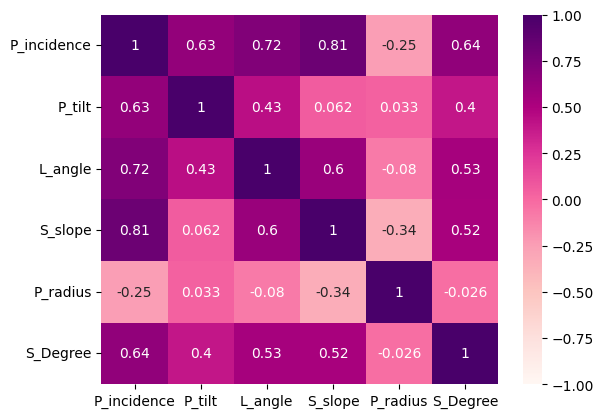

In [14]:
sns.heatmap(df_comb.select_dtypes(include=['float64']).corr(), vmin=-1, vmax=1, annot=True, cmap='RdPu');

### Part 1.3 b - Share insights on correlation

From the above Heatmap, we can observe the following insights:

* `Positive Correlation`: The variables `P_incidence`, `P_tilt`, `L_angle`, and `S_slope` have positive correlations with each other. This indicates that as one variable increases, the others also tend to increase. The highest positive correlation is observed between S_slope and P_incidence (0.815).
* `Negative Correlation`: The variable `P_radius` has a negative correlation with `P_incidence` (-0.247). This suggests that as P_radius decreases, P_incidence tends to increase. However, the negative correlation is relatively weak.
* `Weak Correlation`: The variables `P_radius` and `S_Degree` have a weak correlation (-0.026). This implies that there is little to no linear relationship between these variables.
* `Moderate Correlation`: The variables `P_tilt` and `L_angle` have a moderate correlation (0.433). This indicates that there is a moderate positive relationship between these two variables.

### Part 1.3 c - Visualize a pairplot with 3 classes distinguished by colors and share insights

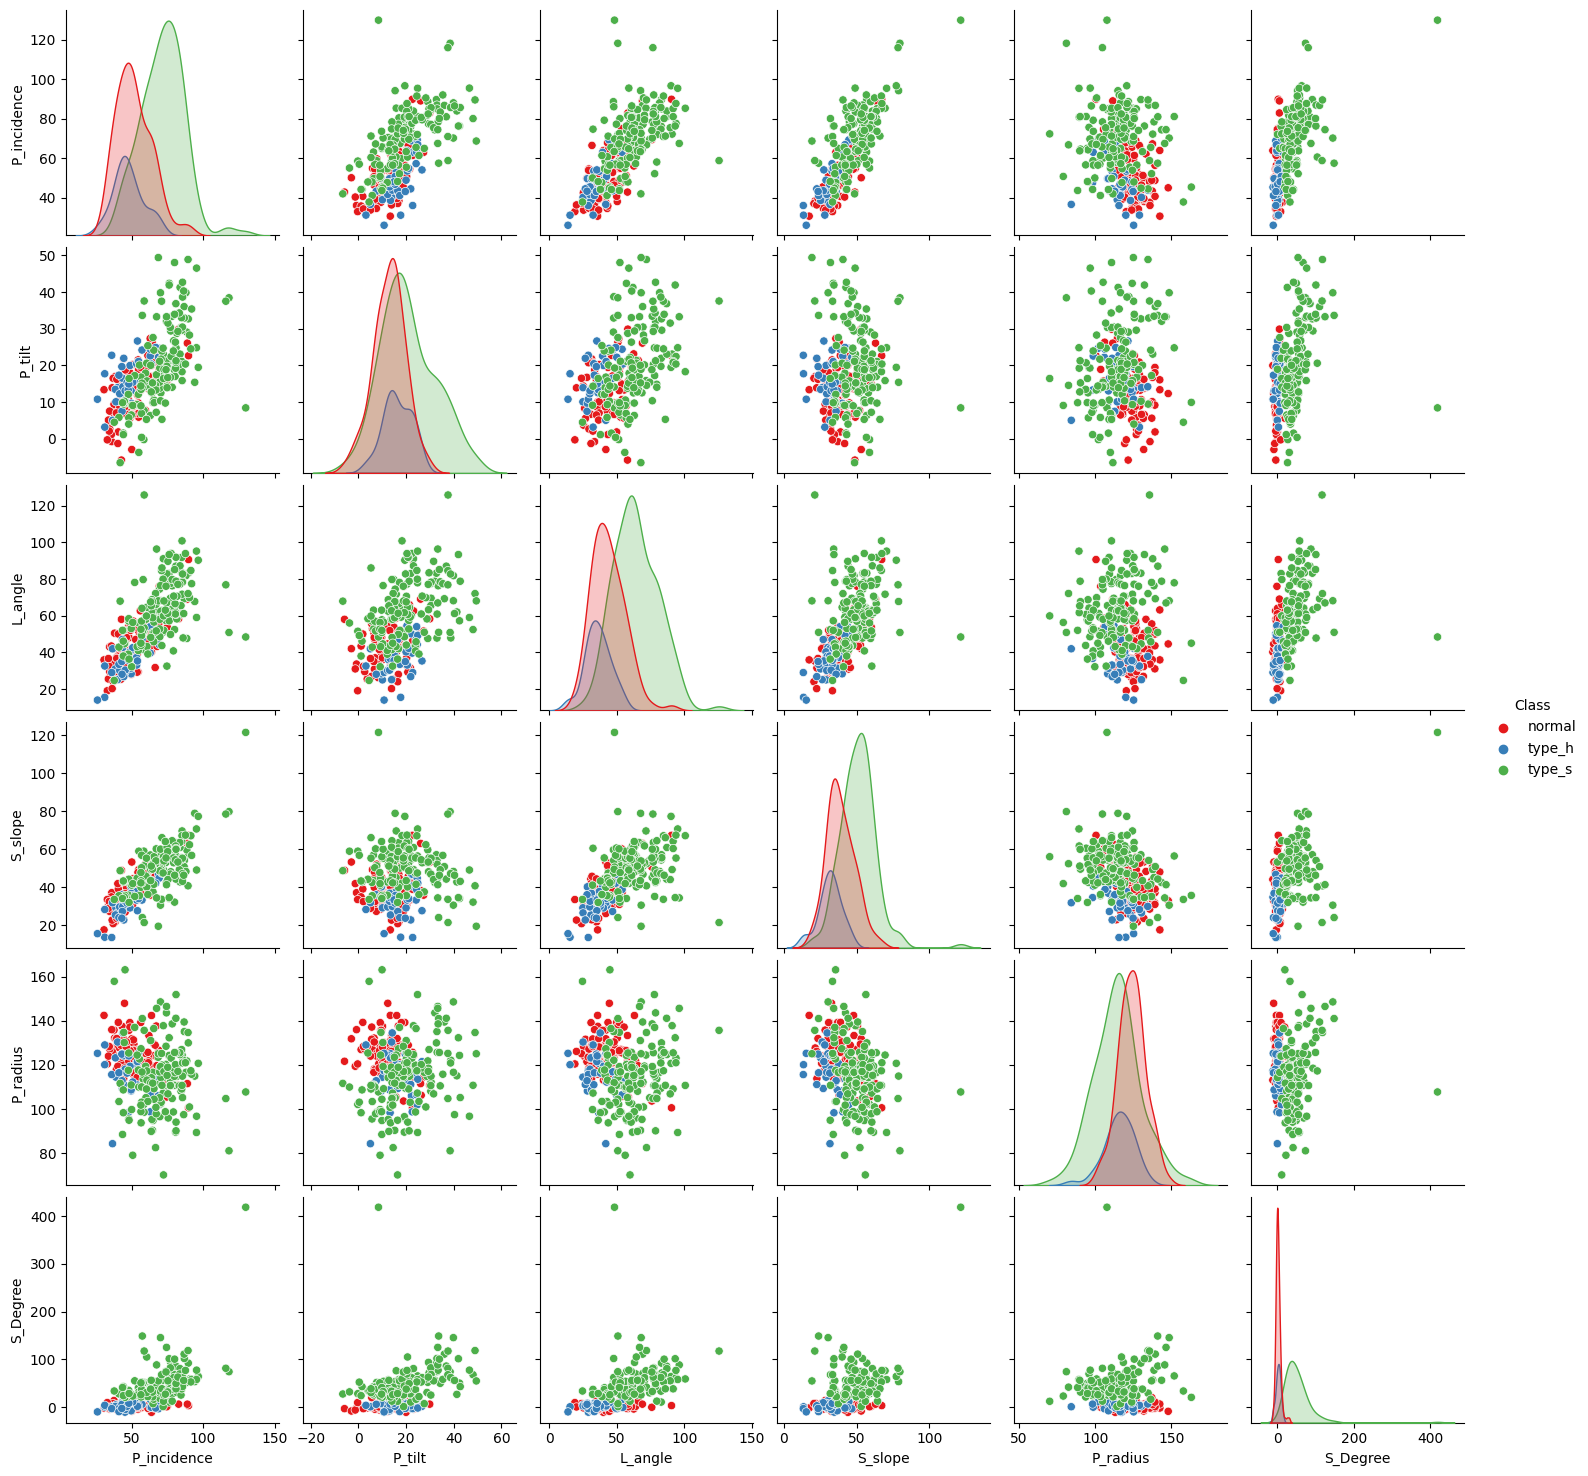

In [ ]:
warnings.filterwarnings("ignore")

# Creating the pairplot
sns.pairplot(df_comb, hue='Class', palette="Set1")
plt.show()

It is observed that 'type_s' Class is relatively more prominent in the DataFrame than 'type_h' and 'normal' Classes.

### Part 1.3 d - Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights

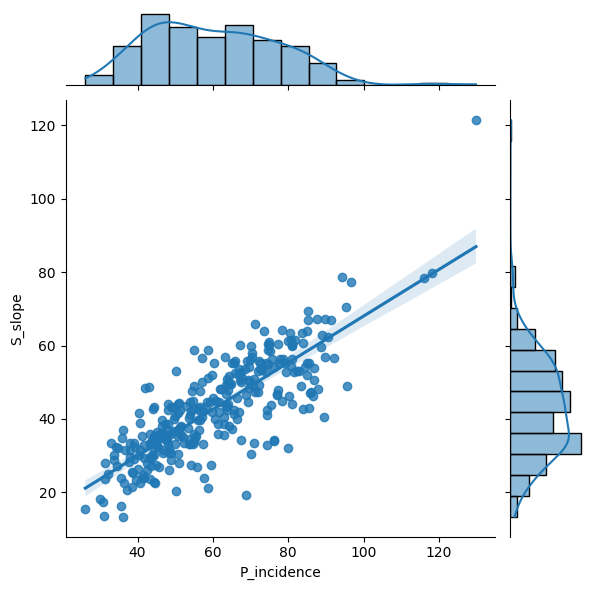

In [17]:
sns.jointplot(data=df_comb, x='P_incidence', y='S_slope', kind='reg');

There seems to be a strong positive correlation between 'P_incidence' and 'S_slope' which means that as one variable increases other also tend to increase.

### Part 1.3 e - Visualize a boxplot to check distribution of the features and share insights.

Skewness Scores:
P_incidence    0.520440
P_tilt         0.676553
L_angle        0.599451
S_slope        0.792577
P_radius      -0.176835
S_Degree       4.317954
dtype: float64


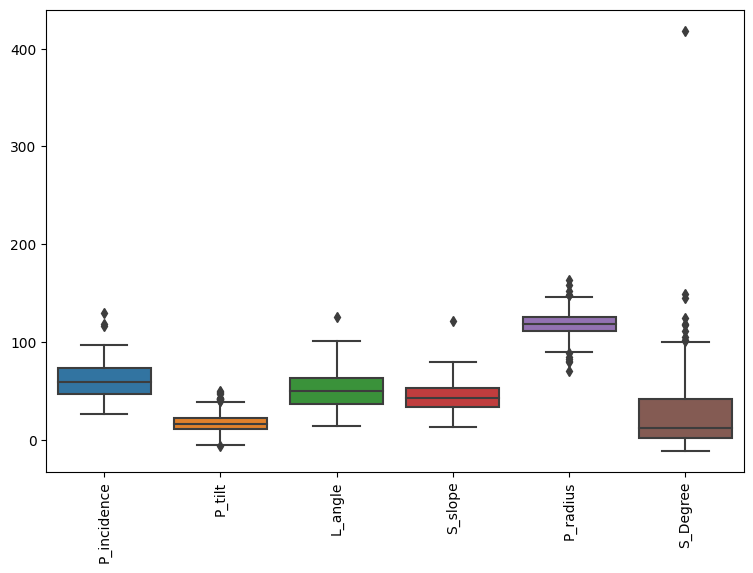

In [15]:
# Calculate skewness scores for numeric columns
num_columns = df_comb.select_dtypes(include=[float, int]).columns
skew_scores = df_comb[num_columns].skew()

# Print skewness scores for numeric columns
print("Skewness Scores:")
print(skew_scores)

plt.figure(figsize=(9, 6))
sns.boxplot(data=df_comb[num_columns])
plt.xticks(rotation=90);

We can see that all the numerical features in the data set have outliers present in them. Also all the columns are right(+ve) skewed except for the column 'P_radius' which is left(-ve) skewed.


Based on the skewness scores for the columns:

* `P_incidence`: The column "P_incidence" has a positive skewness score of 0.520440, indicating a slight right skew. This suggests that the majority of the data points are concentrated towards lower values, with a few higher values causing a longer tail on the right side of the distribution.
* `P_tilt`: The column "P_tilt" has a positive skewness score of 0.676553, indicating a moderate right skew. This implies that the distribution is concentrated towards lower values, with a longer tail on the right side, where a few higher values are present.
* `L_angle`: The column "L_angle" has a positive skewness score of 0.599451, indicating a moderate right skew. This suggests that the majority of the data points are concentrated towards lower values, with a longer tail on the right side due to a few higher values.
* `S_slope`: The column "S_slope" has a positive skewness score of 0.792577, indicating a relatively higher right skew. This suggests that the distribution is concentrated towards lower values, with a pronounced tail on the right side due to a few extreme higher values.
* `P_radius`: The column "P_radius" has a negative skewness score of -0.176835, indicating a slight left skew. This implies that the distribution is concentrated towards higher values, with a few lower values causing a longer tail on the left side.
* `S_Degree`: The column "S_Degree" has a positive skewness score of 4.317954, indicating a significant right skew. This suggests that the majority of the data points are concentrated towards lower values, with an extremely long tail on the right side due to a few very high values.

Let's drop the row with the maximum value of column S_Degree, which is an extreme outlier, from the dataset as it its highy advised to drop very extreme datapoints so that it does not impact the model.

In [16]:
# Find the index of the row with the maximum value in 'S_Degree'
row_to_drop = df_comb['S_Degree'].idxmax()

# Drop the row
df_comb.drop(row_to_drop, axis=0, inplace=True)

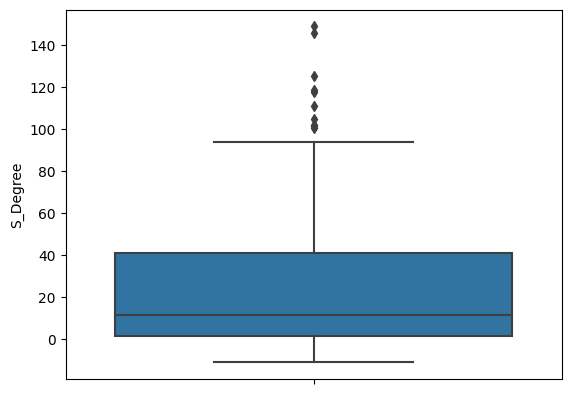

In [17]:
sns.boxplot(data=df_comb, y='S_Degree');

In [18]:
df_comb['S_Degree'].describe().T

count    309.000000
mean      25.027289
std       30.234211
min      -11.058179
25%        1.594748
50%       11.463223
75%       40.880923
max      148.753711
Name: S_Degree, dtype: float64

Therefore the statistics (mean, standard deviation, min, 25th percentile, 50th percentile, 75th percentile, and max) for the S_Degree is now within the reasonable range.

### <span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;">4. Model Building

### Part 1.4 a - Split data into X and Y.

Now before splitting the data into X and Y lets check if the dataset have and missing values or any duplicated entries.

In [19]:
# Check for the duplicated entries
df_comb.duplicated().sum()

0

Therefore there are no duplicate entries.

In [20]:
# Check for the missing values
pd.DataFrame({'Count':df_comb.isnull().sum()[df_comb.isnull().sum()>0],'Percentage':(df_comb.isnull().sum()[df_comb.isnull().sum()>0]/df_comb.shape[0])*100})

Count  Percentage
Class     23    7.443366

Let's deal with the missing values by removing the rows with missing target values. Here's why:- 

1. `Impact on class distribution`: Imputing the missing values in the target variable can potentially introduce bias and distort the class distribution, especially if the missing values are imputed with the majority class (0's) since they are more prevalent. Removing the rows with missing values ensures that the original class distribution is preserved.
2. `Preserving data integrity`: Imputing missing values in the target variable is often a challenging task, especially when dealing with imbalanced datasets. Since the target variable is crucial for model training and evaluation, imputing missing values might introduce uncertainty and compromise the integrity of the data.
3. `Sample representativeness`: By removing the rows with missing values, you retain a representative sample that accurately reflects the available data. This can help ensure that your model is trained on reliable and unbiased information.

In [21]:
df_comb = df_comb.dropna(subset=['Class'])

In [22]:
df_comb.isnull().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

In [23]:
df_comb.shape

(286, 7)

We can notice that all the rows having missing target values have been dropped properly and dataset is now ready for the split.

In [24]:
# Converting data type of Class to Category
df_comb['Class'] = df_comb.Class.astype('category')

In [25]:
# Splitting data into x and y
X = df_comb.drop(labels= "Class" , axis = 1)
y = df_comb["Class"]
X.head()

P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree
0    38.505273  16.964297  35.112814  21.540976  127.632875  7.986683
1    54.920858  18.968430  51.601455  35.952428  125.846646  2.001642
2    44.362490   8.945435  46.902096  35.417055  129.220682  4.994195
3    48.318931  17.452121  48.000000  30.866809  128.980308 -0.910941
4    45.701789  10.659859  42.577846  35.041929  130.178314 -3.388910

### Part 1.4 b - Split data into train and test with 80:20 proportion

Before splitting the data into train and test set we first have to convert the features into z scores as we do not know what units / scales were used and store them in new dataframe.

In [26]:
X_scaled = X.apply(zscore)  # convert all attributes to Z scale 
X_scaled.describe().T

count          mean       std       min       25%       50%  \
P_incidence  286.0  9.937661e-17  1.001753 -2.102482 -0.810374 -0.037323   
P_tilt       286.0  1.739091e-16  1.001753 -2.374309 -0.698326 -0.151715   
L_angle      286.0  2.981298e-16  1.001753 -2.141048 -0.745539 -0.113212   
S_slope      286.0  2.484415e-16  1.001753 -2.478113 -0.770592 -0.046622   
P_radius     286.0  1.440961e-15  1.001753 -3.509007 -0.531486  0.040173   
S_Degree     286.0  0.000000e+00  1.001753 -1.236573 -0.820846 -0.199908   

                  75%       max  
P_incidence  0.776786  3.397698  
P_tilt       0.443510  3.163122  
L_angle      0.580879  3.942045  
S_slope      0.750572  2.911626  
P_radius     0.566407  3.308732  
S_Degree     0.523066  3.978153

Therefore data has be scaled.

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#228B22;"> In the train_test_split function of scikit-learn, the `stratify` parameter is an optional argument that allows you to perform stratified sampling during the train-test split.

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#228B22;"> Stratified sampling is a sampling technique where the class distribution in the dataset is preserved in the train and test splits. This is particularly useful when dealing with imbalanced datasets, where one class may have significantly fewer samples than others. It ensures that the train and test sets have similar class distributions, which can help in achieving more reliable model evaluation and performance estimation.

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#228B22;"> `Note` that it is important to have a sufficient number of samples in each class for stratified sampling to work effectively. If any class has too few samples, you may encounter warnings or errors during the split process.

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#228B22;"> By using the stratify parameter, you can ensure that your train and test sets maintain the class distribution, which is beneficial for evaluating and training models on imbalanced datasets or when class proportions are important in your analysis.
    
    For Example -
    X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=1, stratify=y)
    

In [27]:
# Split X and y into training and test set in 80:20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=1)

In [28]:
X_train.head()

P_incidence    P_tilt   L_angle   S_slope  P_radius  S_Degree
39     -0.631409  0.275383 -0.888962 -1.084422  0.322667 -0.801066
181     0.758766  0.363147  0.220469  0.732919  0.165946  1.557025
38     -0.836695 -0.877997 -0.967339 -0.415848  0.193147 -0.822531
105    -1.259354 -0.349025 -1.535422 -1.424890  0.908065 -0.802953
309    -0.780479 -0.102200 -0.925482 -0.976817 -1.690735  0.049130

We have split the data into train and test set.

### Part 1.4 c - Train a Supervised Learning Classification base model using KNN classifier

In [29]:
knn = KNeighborsClassifier(n_neighbors=5) # By default metric is "euclidean" and weights is "uniform"

In [30]:
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [31]:
# Make predictions on the test data
y_pred = knn.predict(X_test)

We have trained the model using K-NN classifier.

### Part 1.4 d - Print all the possible performance metrics for both train and test data

Performance Metrics: 
Precision: 0.8645231071779745
Recall: 0.7690940244163632
F1-Score: 0.7924438896978944
Accuracy: 0.868421052631579
Score: 0.868421052631579

Confusion Matrix:


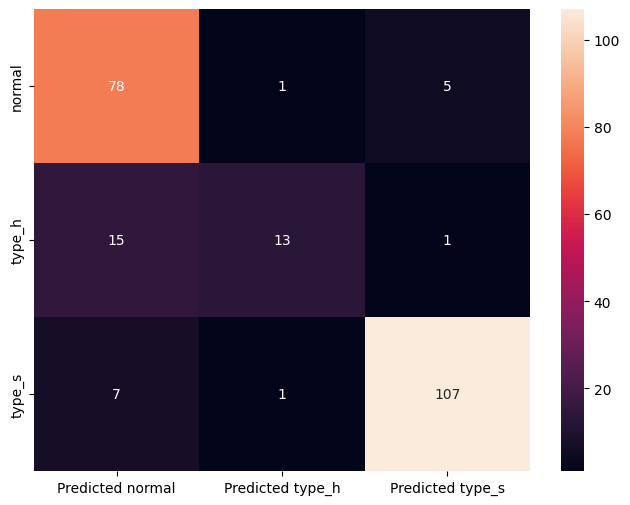

In [32]:
train_pred = knn.predict(X_train)

precision_t = precision_score(Y_train, train_pred, average='macro')
recall_t = recall_score(Y_train, train_pred, average='macro')
f1_t = f1_score(Y_train, train_pred, average='macro')
accuracy_t = accuracy_score(Y_train, train_pred)

# Print the performance metrics
print("Performance Metrics: ")
print("Precision:", precision_t)
print("Recall:", recall_t)
print("F1-Score:", f1_t)
print("Accuracy:", accuracy_t)
print("Score:", knn.score(X_train, Y_train))
print()

print("Confusion Matrix:")
cm=metrics.confusion_matrix(Y_train, train_pred, labels=['normal','type_h','type_s'])
df_cm = pd.DataFrame(cm, index = [i for i in ['normal','type_h','type_s']],
                  columns = [i for i in ['Predicted normal','Predicted type_h','Predicted type_s']])
plt.figure(figsize = (8,6))
sns.heatmap(df_cm, annot=True ,fmt='g');

Performance Metrics: 
Precision: 0.8452380952380952
Recall: 0.636029411764706
F1-Score: 0.6225940225940225
Accuracy: 0.8103448275862069
Score: 0.8103448275862069

Confusion Matrix:



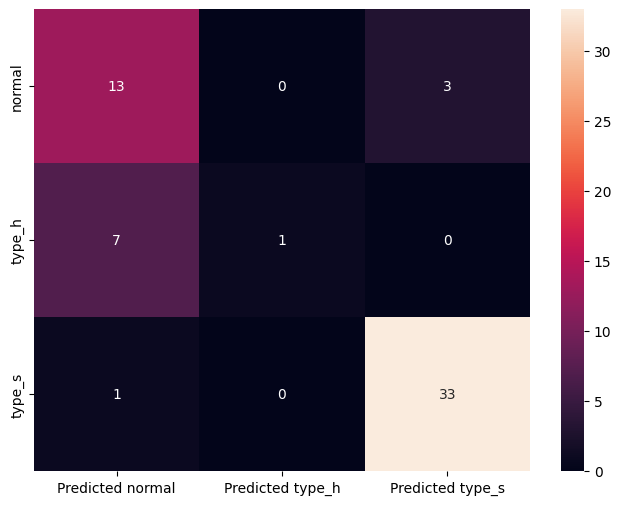

In [33]:
precision = precision_score(Y_test, y_pred, average='macro')
recall = recall_score(Y_test, y_pred, average='macro')
f1 = f1_score(Y_test, y_pred, average='macro')
accuracy = accuracy_score(Y_test, y_pred)

# Print the performance metrics
print("Performance Metrics: ")
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Accuracy:", accuracy)
print("Score:", knn.score(X_test, Y_test))
print()

print("Confusion Matrix:")
cm=metrics.confusion_matrix(Y_test, y_pred, labels=['normal','type_h','type_s'])
df_cm = pd.DataFrame(cm, index = [i for i in ['normal','type_h','type_s']],
                  columns = [i for i in ['Predicted normal','Predicted type_h','Predicted type_s']])
plt.figure(figsize = (8,6))
sns.heatmap(df_cm, annot=True ,fmt='g');
print()

### <span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;">5. Performance Improvement

### Part 1.5 a - Experiment with various parameters to improve performance of the base model
### Part 1.5 b - Clearly showcase improvement in performance achieved
### Part 1.5 c - Clearly state which parameters contributed most to improve model performance.

#### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#556B2F;">Let's first experiment with different distance parameters keeping 'n_neighbors' constant.

##### when distance metric is 'manhattan'

In [34]:
knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn.fit(X_train, Y_train)

KNeighborsClassifier(metric='manhattan')

In [35]:
# Make predictions on the test data
y_pred = knn.predict(X_test)

precision_2 = precision_score(Y_test, y_pred, average='macro')
recall_2 = recall_score(Y_test, y_pred, average='macro')
f1_2 = f1_score(Y_test, y_pred, average='macro')
accuracy_2 = accuracy_score(Y_test, y_pred)

# Print the performance metrics
print("Performance Metrics: ")
print("Precision:", precision_2)
print("Recall:", recall_2)
print("F1-Score:", f1_2)
print("Accuracy:", accuracy_2)
print("Score:", knn.score(X_test, Y_test))
print()

# Changes in performance metrics with respect to base model
precision_change = (precision_2 - precision) * 100
recall_change = (recall_2 - recall)  * 100
f1_change = (f1_2 - f1) * 100
accuracy_change = (accuracy_2 - accuracy)  * 100

# Print the changes in performance
print("Change in Performance metrics:")
print(f"Precision: {precision_change:.2f}%")
print(f"Recall: {recall_change:.2f}%")
print(f"F1-Score: {f1_change:.2f}%")
print(f"Accuracy: {accuracy_change:.2f}%",'\n')

Performance Metrics: 
Precision: 0.835064935064935
Recall: 0.6262254901960784
F1-Score: 0.6113229934740233
Accuracy: 0.7931034482758621
Score: 0.7931034482758621

Change in Performance metrics:
Precision: -1.02%
Recall: -0.98%
F1-Score: -1.13%
Accuracy: -1.72% 



##### when distance metric is 'chebyshev'

In [36]:
knn = KNeighborsClassifier(n_neighbors=5, metric='chebyshev')
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)

In [37]:
precision_3 = precision_score(Y_test, y_pred, average='macro')
recall_3 = recall_score(Y_test, y_pred, average='macro')
f1_3 = f1_score(Y_test, y_pred, average='macro')
accuracy_3 = accuracy_score(Y_test, y_pred)

# Print the performance metrics
print("Performance Metrics: ")
print("Precision:", precision_3)
print("Recall:", recall_3)
print("F1-Score:", f1_3)
print("Accuracy:", accuracy_3)
print("Score:", knn.score(X_test, Y_test))
print()

# Changes in performance metrics with respect to base model
precision_change = (precision_3 - precision) * 100
recall_change = (recall_3 - recall)  * 100
f1_change = (f1_3 - f1) * 100
accuracy_change = (accuracy_3 - accuracy)  * 100

# Print the changes in performance
print("Change in Performance metrics:")
print(f"Precision: {precision_change:.2f}%")
print(f"Recall: {recall_change:.2f}%")
print(f"F1-Score: {f1_change:.2f}%")
print(f"Accuracy: {accuracy_change:.2f}%",'\n')

Performance Metrics: 
Precision: 0.6096491228070176
Recall: 0.5943627450980392
F1-Score: 0.5844155844155844
Accuracy: 0.7758620689655172
Score: 0.7758620689655172

Change in Performance metrics:
Precision: -23.56%
Recall: -4.17%
F1-Score: -3.82%
Accuracy: -3.45% 



Comparing the performance metrics for the three models base model (euclidean distance model), Manhattan distance model, and Chebyshev distance model, we can make the following observations:

1. `Precision`: The base model has the highest precision with a value of 0.8452, followed by the Manhattan distance model with a precision of 0.8351, and the Chebyshev distance model with a precision of 0.6096. This indicates that the base model and the Manhattan distance model perform better in correctly identifying positive instances compared to the Chebyshev distance model.
2. `Recall`: The base model also has the highest recall with a value of 0.6360, followed by the Manhattan distance model with a recall of 0.6262, and the Chebyshev distance model with a recall of 0.5944. This suggests that the base model and the Manhattan distance model are better at capturing true positive instances compared to the Chebyshev distance model.
3. `F1-Score`: The base model has the highest F1-score with a value of 0.6226, followed by the Manhattan distance model with an F1-score of 0.6113, and the Chebyshev distance model with an F1-score of 0.5844. The F1-score considers both precision and recall, and a higher value indicates a better balance between the two metrics. Therefore, the base model and the Manhattan distance model perform better overall in terms of F1-score.
3. `Accuracy`: The base model also has the highest accuracy with a value of 0.8103, followed by the Manhattan distance model with an accuracy of 0.7931, and the Chebyshev distance model with an accuracy of 0.7759. Accuracy measures the overall correctness of the model's predictions, and the base model performs better in terms of accuracy.

Based on these observations, it can be concluded that the base model performs better in terms of precision, recall, F1-score, and accuracy compared to the models using Manhattan and Chebyshev distance metrics. Therefore, the base model may be considered the most effective in predicting the condition of the patients based on the given test results.

#### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#556B2F;">Let's now experiment with different values of 'n_neighbors' keeping distance metric constant.

##### When n_neighbors = 3

In [38]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)

In [39]:
precision_4 = precision_score(Y_test, y_pred, average='macro')
recall_4 = recall_score(Y_test, y_pred, average='macro')
f1_4 = f1_score(Y_test, y_pred, average='macro')
accuracy_4 = accuracy_score(Y_test, y_pred)

# Print the performance metrics
print("Performance Metrics: ")
print("Precision:", precision_4)
print("Recall:", recall_4)
print("F1-Score:", f1_4)
print("Accuracy:", accuracy_4)
print("Score:", knn.score(X_test, Y_test))
print()

# Changes in performance metrics with respect to base model
precision_change = (precision_4 - precision) * 100
recall_change = (recall_4 - recall)  * 100
f1_change = (f1_4 - f1) * 100
accuracy_change = (accuracy_4 - accuracy)  * 100

# Print the changes in performance
print("Change in Performance metrics:")
print(f"Precision: +{precision_change:.2f}%","Improvement")
print(f"Recall: +{recall_change:.2f}%","Improvement")
print(f"F1-Score: +{f1_change:.2f}%","Improvement")
print(f"Accuracy: +{accuracy_change:.2f}%","Improvement \n")

Performance Metrics: 
Precision: 0.8742540494458653
Recall: 0.6776960784313726
F1-Score: 0.6540137422490364
Accuracy: 0.8448275862068966
Score: 0.8448275862068966

Change in Performance metrics:
Precision: +2.90% Improvement
Recall: +4.17% Improvement
F1-Score: +3.14% Improvement
Accuracy: +3.45% Improvement 



##### When n_neighbors = 7

In [40]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)

In [41]:
precision_5 = precision_score(Y_test, y_pred, average='macro')
recall_5 = recall_score(Y_test, y_pred, average='macro')
f1_5 = f1_score(Y_test, y_pred, average='macro')
accuracy_5 = accuracy_score(Y_test, y_pred)

# Print the performance metrics
print("Performance Metrics: ")
print("Precision:", precision_5)
print("Recall:", recall_5)
print("F1-Score:", f1_5)
print("Accuracy:", accuracy_5)
print("Score:", knn.score(X_test, Y_test))
print()

# Changes in performance metrics with respect to base model
precision_change = (precision_5 - precision) * 100
recall_change = (recall_5 - recall)  * 100
f1_change = (f1_5 - f1) * 100
accuracy_change = (accuracy_5 - accuracy)  * 100

# Print the changes in performance
print("Change in Performance metrics:")
print(f"Precision: {precision_change:.2f}%")
print(f"Recall: {recall_change:.2f}%")
print(f"F1-Score: {f1_change:.2f}%")
print(f"Accuracy: {accuracy_change:.2f}%",'\n')

Performance Metrics: 
Precision: 0.49603174603174605
Recall: 0.573529411764706
F1-Score: 0.5305019305019304
Accuracy: 0.7758620689655172
Score: 0.7758620689655172

Change in Performance metrics:
Precision: -34.92%
Recall: -6.25%
F1-Score: -9.21%
Accuracy: -3.45% 



#### When n_neighbors = 9

In [42]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)

In [43]:
precision_6 = precision_score(Y_test, y_pred, average='macro')
recall_6 = recall_score(Y_test, y_pred, average='macro')
f1_6 = f1_score(Y_test, y_pred, average='macro')
accuracy_6 = accuracy_score(Y_test, y_pred)

# Print the performance metrics
print("Performance Metrics: ")
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Accuracy:", accuracy_6)
print("Score:", knn.score(X_test, Y_test))
print()

# Changes in performance metrics with respect to base model
precision_change = (precision_6 - precision) * 100
recall_change = (recall_6 - recall)  * 100
f1_change = (f1_6 - f1) * 100
accuracy_change = (accuracy_6 - accuracy)  * 100

# Print the changes in performance
print("Change in Performance metrics:")
print(f"Precision: {precision_change:.2f}%")
print(f"Recall: +{recall_change:.2f}%","Improvement")
print(f"F1-Score: +{f1_change:.2f}%","Improvement")
print(f"Accuracy: {accuracy_change:.2f}%","\n")

Performance Metrics: 
Precision: 0.8452380952380952
Recall: 0.636029411764706
F1-Score: 0.6225940225940225
Accuracy: 0.8103448275862069
Score: 0.8103448275862069

Change in Performance metrics:
Precision: -10.69%
Recall: +2.08% Improvement
F1-Score: +4.15% Improvement
Accuracy: 0.00% 



Observations from the above experiments-

1. `Precision`: The model with n_neighbors = 3 has the highest precision with a value of 0.8743, followed by the base model with a precision of 0.8452, n_neighbors = 9 with a precision of 0.8452, and n_neighbors = 7 with the lowest precision of 0.4960. This suggests that the models with n_neighbors = 3 and n_neighbors = 9 perform similarly in correctly identifying positive instances, while the model with n_neighbors = 7 has a lower precision.
2. `Recall`: The model with n_neighbors = 3 has the highest recall with a value of 0.6777, followed by the base model and n_neighbors = 9 with a recall of 0.6360, and n_neighbors = 7 with the lowest recall of 0.5735. This indicates that the models with n_neighbors = 3 and n_neighbors = 9 capture more true positive instances compared to the model with n_neighbors = 7.
3. `F1-Score`: The model with n_neighbors = 3 has the highest F1-score with a value of 0.6540, followed by the base model and n_neighbors = 9 with an F1-score of 0.6226, and n_neighbors = 7 with the lowest F1-score of 0.5305. The F1-score considers both precision and recall, and a higher value indicates a better balance between the two metrics.
4. `Accuracy`: The model with n_neighbors = 3 has the highest accuracy with a value of 0.8448, followed by the base model and n_neighbors = 9 with an accuracy of 0.8103, and n_neighbors = 7 with the lowest accuracy of 0.7759. Accuracy measures the overall correctness of the model's predictions, and the model with n_neighbors = 3 performs the best in terms of accuracy.

Based on these observations, it can be concluded that the model with n_neighbors = 3 performs better in terms of precision, recall, F1-score, and accuracy compared to the base model and the models with n_neighbors = 7 and n_neighbors = 9. Therefore, using n_neighbors = 3 may result in improved predictions for the condition of the patients based on the given test results.

#### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#556B2F;">Let's now change 'weights' parameter to 'distance' while keeping other parameters constant.

In [44]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance') # default value of weights is 'uniform'
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)

In [45]:
precision_7 = precision_score(Y_test, y_pred, average='macro')
recall_7 = recall_score(Y_test, y_pred, average='macro')
f1_7 = f1_score(Y_test, y_pred, average='macro')
accuracy_7 = accuracy_score(Y_test, y_pred)

# Print the performance metrics
print("Performance Metrics: ")
print("Precision:", precision_7)
print("Recall:", recall_7)
print("F1-Score:", f1_7)
print("Accuracy:", accuracy_7)
print("Score:", knn.score(X_test, Y_test))
print()

# Changes in performance metrics with respect to base model
precision_change = (precision_7 - precision) * 100
recall_change = (recall_7 - recall)  * 100
f1_change = (f1_7 - f1) * 100
accuracy_change = (accuracy_7 - accuracy)  * 100

# Print the changes in performance
print("Change in Performance metrics:")
print(f"Precision: +{precision_change:.2f}%","Improvement")
print(f"Recall: +{recall_change:.2f}%","Improvement")
print(f"F1-Score: +{f1_change:.2f}%","Improvement")
print(f"Accuracy: +{accuracy_change:.2f}%","Improvement \n")

Performance Metrics: 
Precision: 0.8597402597402596
Recall: 0.6568627450980392
F1-Score: 0.6385286888719383
Accuracy: 0.8275862068965517
Score: 0.8275862068965517

Change in Performance metrics:
Precision: +1.45% Improvement
Recall: +2.08% Improvement
F1-Score: +1.59% Improvement
Accuracy: +1.72% Improvement 



We can observe that overall accuracy score and othe performance metrics has increased compared to base model which means it is more favourable to use 'distance' value to built best model. 

#### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#556B2F;"> Let's now do Hyper-parameter tuning by Grid-Search Technique

In [48]:
warnings.filterwarnings("ignore")

# Creating the KNN classifier object
knn = KNeighborsClassifier()

# Defining the parameter grid for grid search
param_grid = {
    'n_neighbors': list(range(1, 20)),  # Values of K from 1 to 20
    'weights': ['uniform', 'distance', 'custom_weights'],  # Different weight options
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Different algorithm options
    'leaf_size': list(range(10,60,10)),  # Different leaf sizes
    'p': [1, 2, 3],  # Different power parameters for Minkowski metric
    'metric': ['euclidean', 'manhattan', 'Chebyshev']  # Different distance metrics
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=10)
grid_search.fit(X_train, Y_train)

# Print the best parameter combination
print("Best Parameters: \n", grid_search.best_params_, "\n")

# Evaluate the model with best parameters on the test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Best Parameters: 
 {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'euclidean', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'} 

Accuracy: 0.7758620689655172


From the given output, we can draw the following important insights:

* `Best Parameter Combination`: The output displays the best parameter combination selected by the grid search algorithm. These parameters are determined based on the performance of the KNN classifier using cross-validation. In this case, the best parameter combination consists of an 'algorithm' of 'auto', a 'leaf_size' of 10, 'metric' as 'euclidean', 'n_neighbors' as 7, 'p' as 1, and 'weights' as 'uniform'.
* `Accuracy`: The accuracy score on the test data is also displayed. In this case, the accuracy is 0.7758, which indicates that the KNN classifier with the best parameter combination achieved an accuracy of approximately 77.58% on the test data.

#### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#556B2F;"> Let's now apply Cross Validation technique to the model

In [49]:
# Create the KNN classifier object
knn = KNeighborsClassifier()

# Perform k-fold cross-validation
k = 7  # Number of folds
scores = cross_val_score(knn, X, y, cv=k, scoring='accuracy')

# Print the scores for each fold
print("Cross-Validation Scores:", scores)

# Calculate and print the average score
average_score = scores.mean()
print("Average Score:", average_score)


Cross-Validation Scores: [0.7804878  0.87804878 0.7804878  0.82926829 0.90243902 0.80487805
 0.925     ]
Average Score: 0.8429442508710802


From the given output, we can draw the following meaningful insights:

* `Cross-Validation Scores`: The output displays the accuracy scores obtained for each fold during k-fold cross-validation. The accuracy scores for the individual folds are: [0.7804878   0.87804878 0.7804878  0.82926829 0.90243902 0.80487805 0.925]. These scores indicate the performance of the KNN classifier on different subsets of the data when trained and evaluated using cross-validation.
* `Average Score`: The average score is calculated by taking the mean of the accuracy scores obtained from cross-validation. In this case, the average score is approximately 0.8429. This value represents an overall estimate of the KNN classifier's performance on the dataset using k-fold cross-validation.

#### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#556B2F;"> Let's now try Randomized Search Cross-Validation technique to the model

In [50]:
# Define the parameter distribution for random search
param_dist = {
    'n_neighbors': randint(1, 20),  # Randomly sample values between 1 and 20
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'metric': ['euclidean', 'manhattan','chebyshev']
}

knn = KNeighborsClassifier()

# Perform random search with cross-validation
random_search = RandomizedSearchCV(estimator=knn, param_distributions=param_dist, cv=7, n_iter=10, random_state=10)
random_search.fit(X_train, Y_train)

print("Best Parameters:", random_search.best_params_)

# Evaluate the model with best parameters on the test data
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Best Parameters: {'metric': 'chebyshev', 'n_neighbors': 13, 'p': 2, 'weights': 'distance'}
Accuracy: 0.7931034482758621



From the given output, we can draw the following important observations:

* `Random Search`: The code performs a random search for hyperparameter tuning using RandomizedSearchCV. Random search randomly samples parameter values from the defined parameter distribution param_dist to search for the best combination of hyperparameters. It allows for a more efficient exploration of the hyperparameter space compared to an exhaustive grid search.
* `Best Parameter Combination`: The output displays the best parameter combination selected by the random search algorithm. The best parameters are: 'metric': 'chebyshev', 'n_neighbors': 13, 'p': 2, and 'weights': 'distance'. These parameters are determined based on the performance of the KNN classifier using cross-validation and random sampling of parameter values.
* `Accuracy`: The accuracy score on the test data is also displayed. In this case, the accuracy is 0.7931, indicating that the KNN classifier with the best parameter combination achieved an accuracy of approximately 79.31% on the test data.

#### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#556B2F;">Let's now try to observe and showcase improvements in performance achieved with the help of visualizations.

 Let's plot and observe line-chart for the different values of scores againts different combinations of parameters. This chart will give us the insight about to the best or optimal values of K and other parameters to built best model.

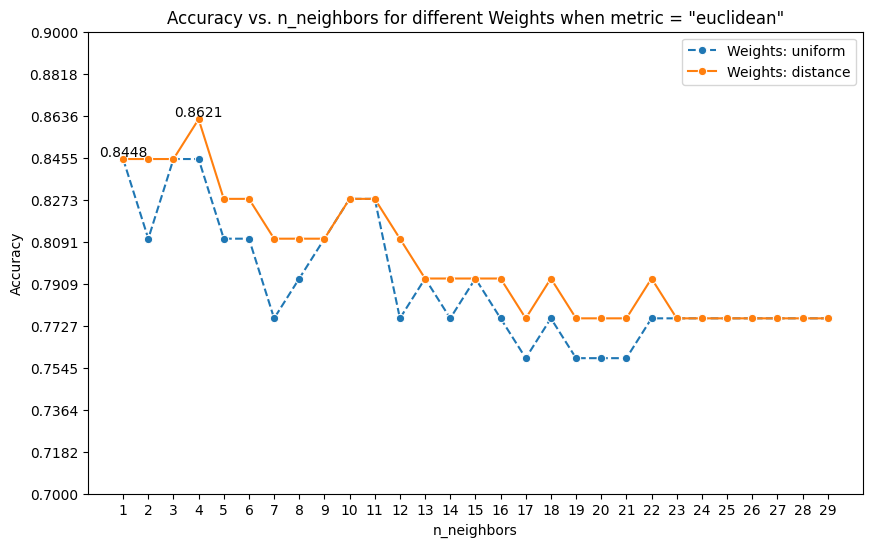

In [47]:
weights = ['uniform', 'distance']

plt.figure(figsize=(10, 6))
for i, weight in enumerate(weights):
    kscores = []
    for k in range(1, 30):
        knn = KNeighborsClassifier(n_neighbors=k, weights=weight, metric='euclidean')
        knn.fit(X_train, Y_train)
        kscores.append(knn.score(X_test, Y_test))
    
    # Define line style for each weight
    line_style = 'solid' if i == 1 else 'dashed'
    
    sns.lineplot(x=range(1, 30), y=kscores, marker='o', markers=True, label=f'Weights: {weight}',
                 linestyle=line_style)
    
    # Find the peak accuracy value and its corresponding k value
    peak_index = np.argmax(kscores)
    peak_k = peak_index + 1
    peak_accuracy = kscores[peak_index]
    
    # Label the peak point
    plt.text(peak_k, peak_accuracy, f'{peak_accuracy:.4f}', ha='center', va='bottom')

plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. n_neighbors for different Weights when metric = "euclidean"')
plt.yticks(np.linspace(0.70, 0.90, 12))
plt.xticks(range(1, 30))
plt.legend()
plt.show()


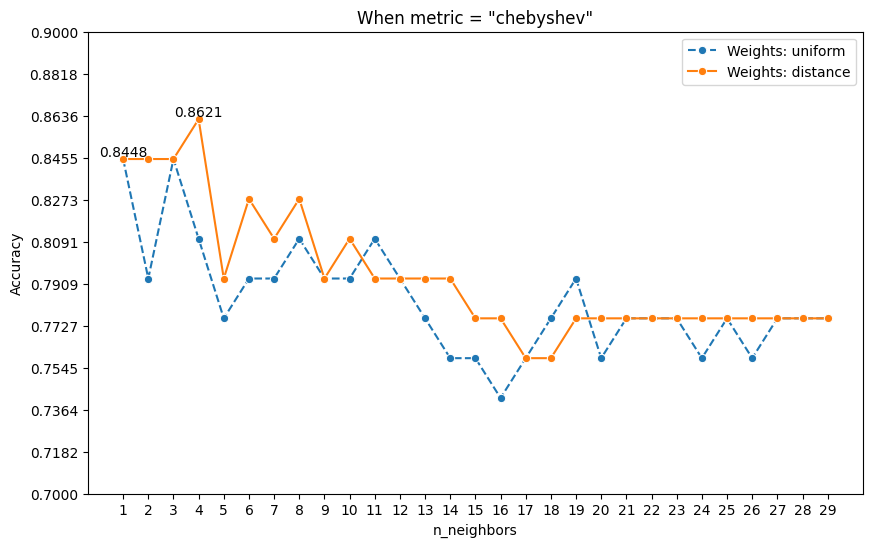

In [49]:
weights = ['uniform', 'distance']

plt.figure(figsize=(10, 6))
for i, weight in enumerate(weights):
    kscores = []
    for k in range(1, 30):
        knn = KNeighborsClassifier(n_neighbors=k, weights=weight, metric='chebyshev')
        knn.fit(X_train, Y_train)
        kscores.append(knn.score(X_test, Y_test))
    
    # Define line style for each weight
    line_style = 'solid' if i == 1 else 'dashed'
    
    sns.lineplot(x=range(1, 30), y=kscores, marker='o', markers=True, label=f'Weights: {weight}',
                 linestyle=line_style)
    
    # Find the peak accuracy value and its corresponding k value
    peak_index = np.argmax(kscores)
    peak_k = peak_index + 1
    peak_accuracy = kscores[peak_index]
    
    # Label the peak point
    plt.text(peak_k, peak_accuracy, f'{peak_accuracy:.4f}', ha='center', va='bottom')

plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.title('When metric = "chebyshev"')
plt.yticks(np.linspace(0.70, 0.90, 12))
plt.xticks(range(1, 30))
plt.legend()
plt.show()


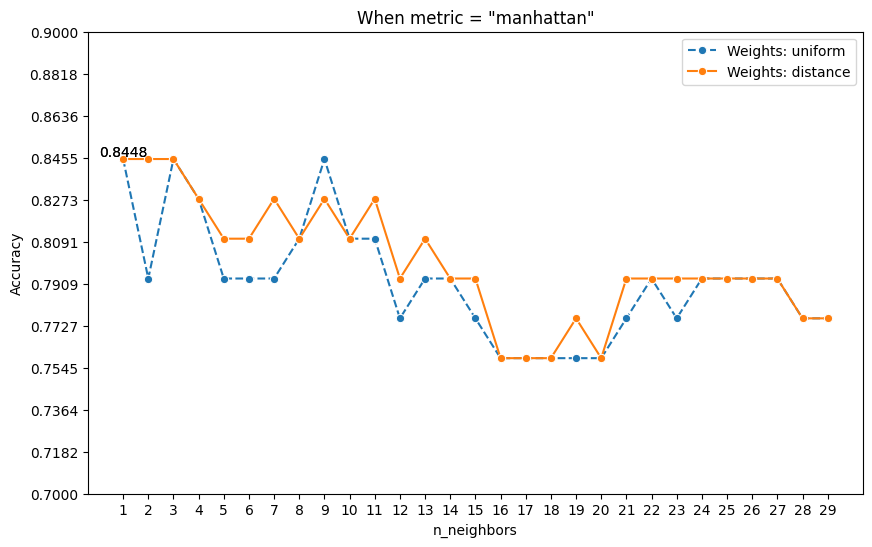

In [51]:
weights = ['uniform', 'distance']

plt.figure(figsize=(10, 6))
for i, weight in enumerate(weights):
    kscores = []
    for k in range(1, 30):
        knn = KNeighborsClassifier(n_neighbors=k, weights=weight, metric='manhattan')
        knn.fit(X_train, Y_train)
        kscores.append(knn.score(X_test, Y_test))
    
    # Define line style for each weight
    line_style = 'solid' if i == 1 else 'dashed'
    
    sns.lineplot(x=range(1, 30), y=kscores, marker='o', markers=True, label=f'Weights: {weight}',
                 linestyle=line_style)
    
    # Find the peak accuracy value and its corresponding k value
    peak_index = np.argmax(kscores)
    peak_k = peak_index + 1
    peak_accuracy = kscores[peak_index]
    
    # Label the peak point
    plt.text(peak_k, peak_accuracy, f'{peak_accuracy:.4f}', ha='center', va='bottom')

plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.title('When metric = "manhattan"')
plt.yticks(np.linspace(0.70, 0.90, 12))
plt.xticks(range(1, 30))
plt.legend()
plt.show()


Observation:-

   * From the above plots we can clearly observe that `Euclidean` and `Chebyshev` distance metric equally contributes the most for the improvement in our model performance as compared to 'Manhattan' distance metric.
   * We can also observe that when Weights is set as 'distance' then the accuracy score tends to be relatively higher for the given range of 'K' values than that of 'uniform' indicating better contribution of 'distance' in our model performance. 

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#000000;">****************************************************************************************************************

# <center><span style="font-family: Arial; font-weight:bold;font-size:2.2em;color:#FFA500">PART - 2</center>

<span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#708090"> `DOMAIN`: Banking, Marketing
    
    
<span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#708090"> `CONTEXT`: A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base where majority of them are
liability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the borrowers base rapidly to bring in more business via loan interests. A campaign that the bank ran in last quarter showed an average single digit conversion rate. Digital transformation being the core strength of the business strategy, marketing department wants to devise effective campaigns with better target marketing to increase the conversion ratio to double digit with same budget as per last campaign.
    
    
<span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#708090"> `DATA DICTIONARY`:
1. `ID`: Customer ID
2. `Age`: Customer’s approximate age.
3. `CustomerSince`: Customer of the bank since. [unit is masked]
4. `HighestSpend`: Customer’s highest spend so far in one transaction. [unit is masked]
5. `ZipCode`: Customer’s zip code.
6. `HiddenScore`: A score associated to the customer which is masked by the bank as an IP.
7. `MonthlyAverageSpend`: Customer’s monthly average spend so far. [unit is masked]
8. `Level`: A level associated to the customer which is masked by the bank as an IP.
9. `Mortgage`: Customer’s mortgage. [unit is masked]
10. `Security`: Customer’s security asset with the bank. [unit is masked]
11. `FixedDepositAccount`: Customer’s fixed deposit account with the bank. [unit is masked]
12. `InternetBanking`: if the customer uses internet banking.
13. `CreditCard`: if the customer uses bank’s credit card.
14. `LoanOnCard`: if the customer has a loan on credit card.
    
    
<span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#708090"> `PROJECT OBJECTIVE`: Build a Machine Learning model to perform focused marketing by predicting the potential customers who will convert using the historical dataset.

### <span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;"> 1. Data Understanding and Preparation

### Part 2.1 a - Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables

In [2]:
d1 = pd.read_csv('/Users/parinparmar/Desktop/Great Learning/AI-ML /Supervised Learning (3)/SUPERVISED LEARNING - PROJECT/Data1.csv')
d2 = pd.read_csv('/Users/parinparmar/Desktop/Great Learning/AI-ML /Supervised Learning (3)/SUPERVISED LEARNING - PROJECT/Data2.csv')

### Part 2.1 b - Print shape and Column Names and DataTypes of both the Dataframes.

In [53]:
print("Shape of Data1: ",d1.shape)
print("Shape of data2: ",d2.shape)

Shape of Data1:  (5000, 8)
Shape of data2:  (5000, 7)


In [3]:
print("Column names and thier respective DataTypes of Data1 are:\n",d1.dtypes)
print()
print("Column names and thier respective DataTypes of Data2 are:\n",d2.dtypes)
print()

Column names and thier respective DataTypes of Data1 are:
 ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
dtype: object

Column names and thier respective DataTypes of Data2 are:
 ID                       int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object



### Part 2.1 c - Merge both the Dataframes on ‘ID’ feature to form a single DataFrame


In [54]:
df_new = pd.merge(d1, d2, on='ID')
df_new.head()

ID  Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  \
0   1   25              1            49    91107            4   
1   2   45             19            34    90089            3   
2   3   39             15            11    94720            1   
3   4   35              9           100    94112            1   
4   5   35              8            45    91330            4   

   MonthlyAverageSpend  Level  Mortgage  Security  FixedDepositAccount  \
0                  1.6      1         0         1                    0   
1                  1.5      1         0         1                    0   
2                  1.0      1         0         0                    0   
3                  2.7      2         0         0                    0   
4                  1.0      2         0         0                    0   

   InternetBanking  CreditCard  LoanOnCard  
0                0           0         NaN  
1                0           0         NaN  
2                0           0         NaN  
3                0           0         NaN  
4                0           1         NaN

In [55]:
df_new.shape

(5000, 14)

In [ ]:
print("Column names and their respective DataTypes of Data1 are:\n", d1.dtypes)
print()
print("Column names and their respective DataTypes of Data2 are:\n", d2.dtypes)
print()

Bothe the data frames have been merged propely.

### Part 2.1 d - Change Datatype of below features to ‘Object’

### ‘CreditCard’, ‘InternetBanking’, ‘FixedDepositAccount’, ‘Security’, ‘Level’, ‘HiddenScore’.

In [56]:
df_new.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

We can see that the features ‘CreditCard’, ‘InternetBanking’, ‘FixedDepositAccount’, ‘Security’, ‘Level’, ‘HiddenScore’ are of datatype int64. So let's convert the datatype to 'Object'. 

Reason behind performing this operation: - Values in these features are binary i.e. 1/0. But DataType is ‘int’/’float’ which is not expected.

'ZipCode' should also be changed to object datatype as it's catagorical variable.

In [57]:
columns_convert = ['ZipCode','CreditCard', 'InternetBanking', 'FixedDepositAccount', 'Security', 'Level', 'HiddenScore']
df_new[columns_convert] = df_new[columns_convert].astype('object')

print(df_new.dtypes)

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                 object
HiddenScore             object
MonthlyAverageSpend    float64
Level                   object
Mortgage                 int64
Security                object
FixedDepositAccount     object
InternetBanking         object
CreditCard              object
LoanOnCard             float64
dtype: object


Therefore we can notice that datatype of the mentioned featues have changed to 'object'.

### <span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;"> 2. Data Exploration and Analysis

### Part 2.2 a - Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights

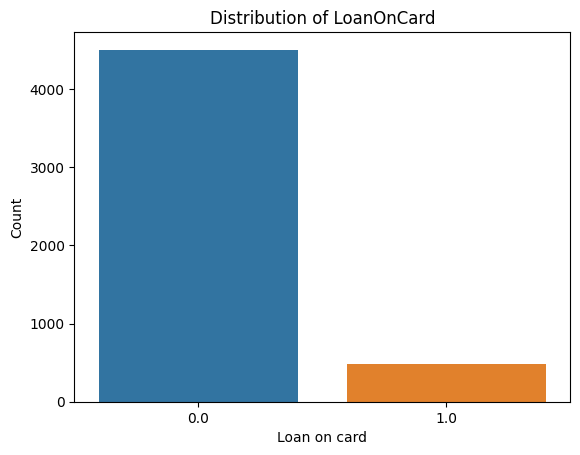

In [58]:
sns.countplot(data=df_new, x='LoanOnCard')
plt.xlabel('Loan on card')
plt.ylabel('Count')
plt.title('Distribution of LoanOnCard');

Based on the countplot of the target variable 'LoanOnCard', it appears that the majority of customers in the dataset have a value of 0.0 for 'LoanOnCard' (indicating no loan on credit card), with a count of more than 4000. On the other hand, the count of customers with a value of 1.0 for 'LoanOnCard' (indicating a loan on credit card) is below 1000.

This suggests that there is an imbalance in the distribution of the target variable classes, with a significantly larger number of customers having no loan on their credit card compared to those who do have a loan.

### Part 2.2 b - Check the percentage of missing values and impute if required

Let's check for the missing value in the dataset and if present then check for the percentage of if feature wise.

before that first let's check for duplicate values.

In [59]:
df_new.duplicated().sum()

0

Therefore data is free of any duplicity.

In [60]:
# Check for missing values
pd.DataFrame({'Count':df_new.isnull().sum()[df_new.isnull().sum()>0],'Percentage':(df_new.isnull().sum()[df_new.isnull().sum()>0]/df_new.shape[0])*100})

Count  Percentage
LoanOnCard     20         0.4

We can notice that only target column has 20 missing values or 0.4% of datapoints missing.

Since there is an imbalance in the dataset, with a significantly large number of 0's compared to 1's in the target variable, and the target column has very few missing values (0.4% of datapoints missing in this case), it would be best to remove the rows with missing values rather than imputing them. Here's why:

* `Impact on class distribution`: Imputing the missing values in the target variable can potentially introduce bias and distort the class distribution, especially if the missing values are imputed with the majority class (0's) since they are more prevalent. Removing the rows with missing values ensures that the original class distribution is preserved.
* `Preserving data integrity`: Imputing missing values in the target variable is often a challenging task, especially when dealing with imbalanced datasets. Since the target variable is crucial for model training and evaluation, imputing missing values might introduce uncertainty and compromise the integrity of the data.
* `Sample representativeness`: By removing the rows with missing values, you retain a representative sample that accurately reflects the available data. This can help ensure that your model is trained on reliable and unbiased information.


In [61]:
df_new = df_new.dropna(subset=['LoanOnCard'])

In [62]:
df_new.shape

(4980, 14)

We can notice that all the rows having missing target values have been dropped and dataset is now ready for the split.

### Part 2.2 c - Check for unexpected values in each categorical variable and impute with best suitable value.

We know that features - ‘CreditCard’, ‘InternetBanking’, ‘FixedDepositAccount’, ‘Security’, ‘Level’, ‘HiddenScore’ are of datatype object. So let's check the unique values in each of these features.

In [63]:
columns = ['CreditCard','InternetBanking', 'FixedDepositAccount', 'Security', 'Level', 'HiddenScore']
for i in columns:
    print('Unique values for ',i,':',df_new[i].unique()) # Print unique values in the column
    print(df_new[i].value_counts()) # Count number of rows with each unique value of feature
    print('\n')

Unique values for  CreditCard : [0 1]
CreditCard
0    3514
1    1466
Name: count, dtype: int64


Unique values for  InternetBanking : [0 1]
InternetBanking
1    2974
0    2006
Name: count, dtype: int64


Unique values for  FixedDepositAccount : [0 1]
FixedDepositAccount
0    4678
1     302
Name: count, dtype: int64


Unique values for  Security : [0 1]
Security
0    4460
1     520
Name: count, dtype: int64


Unique values for  Level : [3 2 1]
Level
1    2089
3    1496
2    1395
Name: count, dtype: int64


Unique values for  HiddenScore : [1 4 3 2]
HiddenScore
1    1466
2    1293
4    1215
3    1006
Name: count, dtype: int64




Hence no unexpected values in any of these Catagorical Variables is observed.

Before splitting the data let's look at the correlation between the features in the dataset and also take a look at some visualizations like Heatmap and pairplot. This will give us some meaningful insights about the features and will also help us decide which features to take into the consideration for good model building. 

In [64]:
# Correlation between the columns 
df_new.corr() 

ID       Age  CustomerSince  HighestSpend  \
ID                   1.000000 -0.010682      -0.010366     -0.020739   
Age                 -0.010682  1.000000       0.994208     -0.054951   
CustomerSince       -0.010366  0.994208       1.000000     -0.046092   
HighestSpend        -0.020739 -0.054951      -0.046092      1.000000   
ZipCode              0.013543 -0.029939      -0.029415     -0.016447   
HiddenScore         -0.015721 -0.045289      -0.051456     -0.158357   
MonthlyAverageSpend -0.026419 -0.051896      -0.049918      0.646109   
Level                0.021763  0.042750       0.014545     -0.188909   
Mortgage            -0.015546 -0.013272      -0.011380      0.207236   
Security            -0.017160  0.000323      -0.000469     -0.002284   
FixedDepositAccount -0.008690  0.007744       0.010085      0.169535   
InternetBanking     -0.003940  0.011227       0.011355      0.014202   
CreditCard           0.015741  0.007344       0.008779     -0.002780   
LoanOnCard          -0.027188 -0.008147      -0.007801      0.502626   

                      ZipCode  HiddenScore  MonthlyAverageSpend     Level  \
ID                   0.013543    -0.015721            -0.026419  0.021763   
Age                 -0.029939    -0.045289            -0.051896  0.042750   
CustomerSince       -0.029415    -0.051456            -0.049918  0.014545   
HighestSpend        -0.016447    -0.158357             0.646109 -0.188909   
ZipCode              1.000000     0.012250            -0.004339 -0.017274   
HiddenScore          0.012250     1.000000            -0.109180  0.065762   
MonthlyAverageSpend -0.004339    -0.109180             1.000000 -0.137020   
Level               -0.017274     0.065762            -0.137020  1.000000   
Mortgage             0.007214    -0.021396             0.110275 -0.032863   
Security             0.006312     0.019061             0.015105 -0.009443   
FixedDepositAccount  0.020007     0.014327             0.136410  0.013982   
InternetBanking      0.017186     0.010900            -0.003475 -0.014556   
CreditCard           0.007302     0.010784            -0.006577 -0.011766   
LoanOnCard           0.000120     0.061761             0.366912  0.137010   

                     Mortgage  Security  FixedDepositAccount  InternetBanking  \
ID                  -0.015546 -0.017160            -0.008690        -0.003940   
Age                 -0.013272  0.000323             0.007744         0.011227   
CustomerSince       -0.011380 -0.000469             0.010085         0.011355   
HighestSpend         0.207236 -0.002284             0.169535         0.014202   
ZipCode              0.007214  0.006312             0.020007         0.017186   
HiddenScore         -0.021396  0.019061             0.014327         0.010900   
MonthlyAverageSpend  0.110275  0.015105             0.136410        -0.003475   
Level               -0.032863 -0.009443             0.013982        -0.014556   
Mortgage             1.000000 -0.005002             0.089167        -0.007044   
Security            -0.005002  1.000000             0.317673         0.014007   
FixedDepositAccount  0.089167  0.317673             1.000000         0.176082   
InternetBanking     -0.007044  0.014007             0.176082         1.000000   
CreditCard          -0.007600 -0.014518             0.278924         0.004960   
LoanOnCard           0.141947  0.021982             0.316131         0.006034   

                     CreditCard  LoanOnCard  
ID                     0.015741   -0.027188  
Age                    0.007344   -0.008147  
CustomerSince          0.008779   -0.007801  
HighestSpend          -0.002780    0.502626  
ZipCode                0.007302    0.000120  
HiddenScore            0.010784    0.061761  
MonthlyAverageSpend   -0.006577    0.366912  
Level                 -0.011766    0.137010  
Mortgage              -0.007600    0.141947  
Security              -0.014518    0.021982  
FixedDepositAccount    0.278924    0.316131  
InternetBanking       

Let's now visualize the correlation with the help of Heatmap.

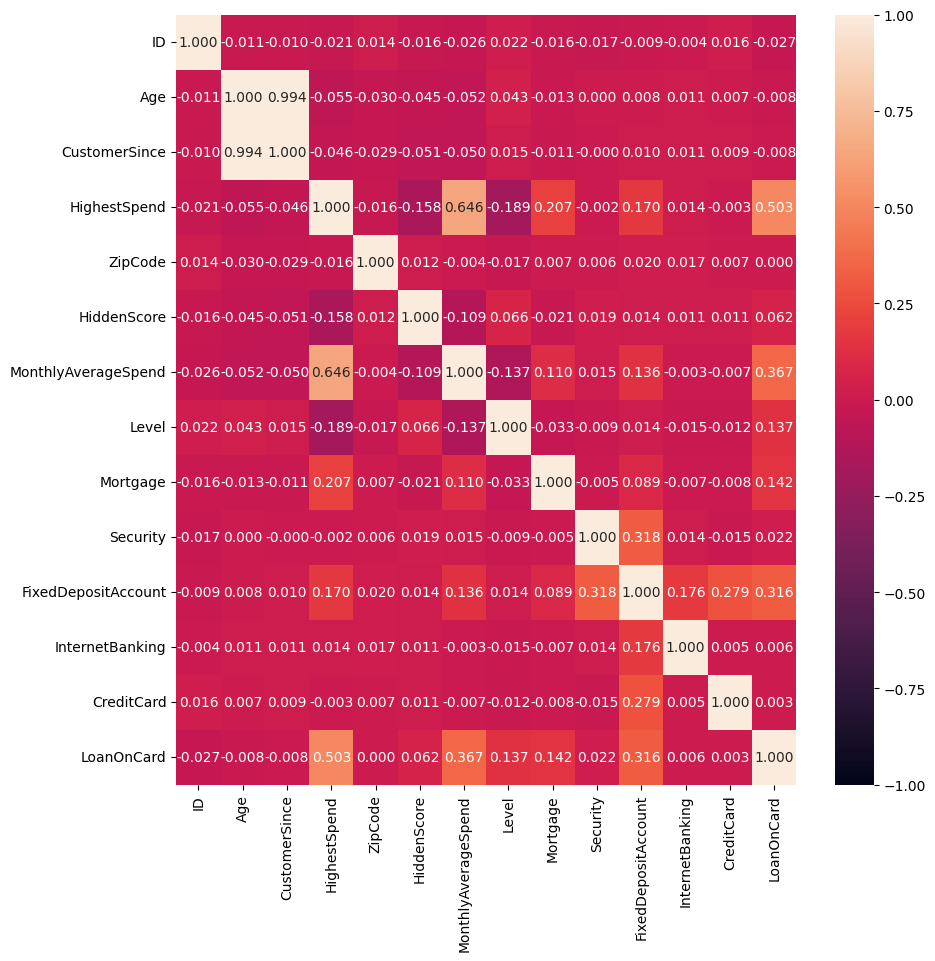

In [65]:
plt.figure(figsize=(10,10))
sns.heatmap(df_new.corr(), vmin=-1, vmax=1, annot=True, fmt='.3f');

Let's look at the pairplot for the features.

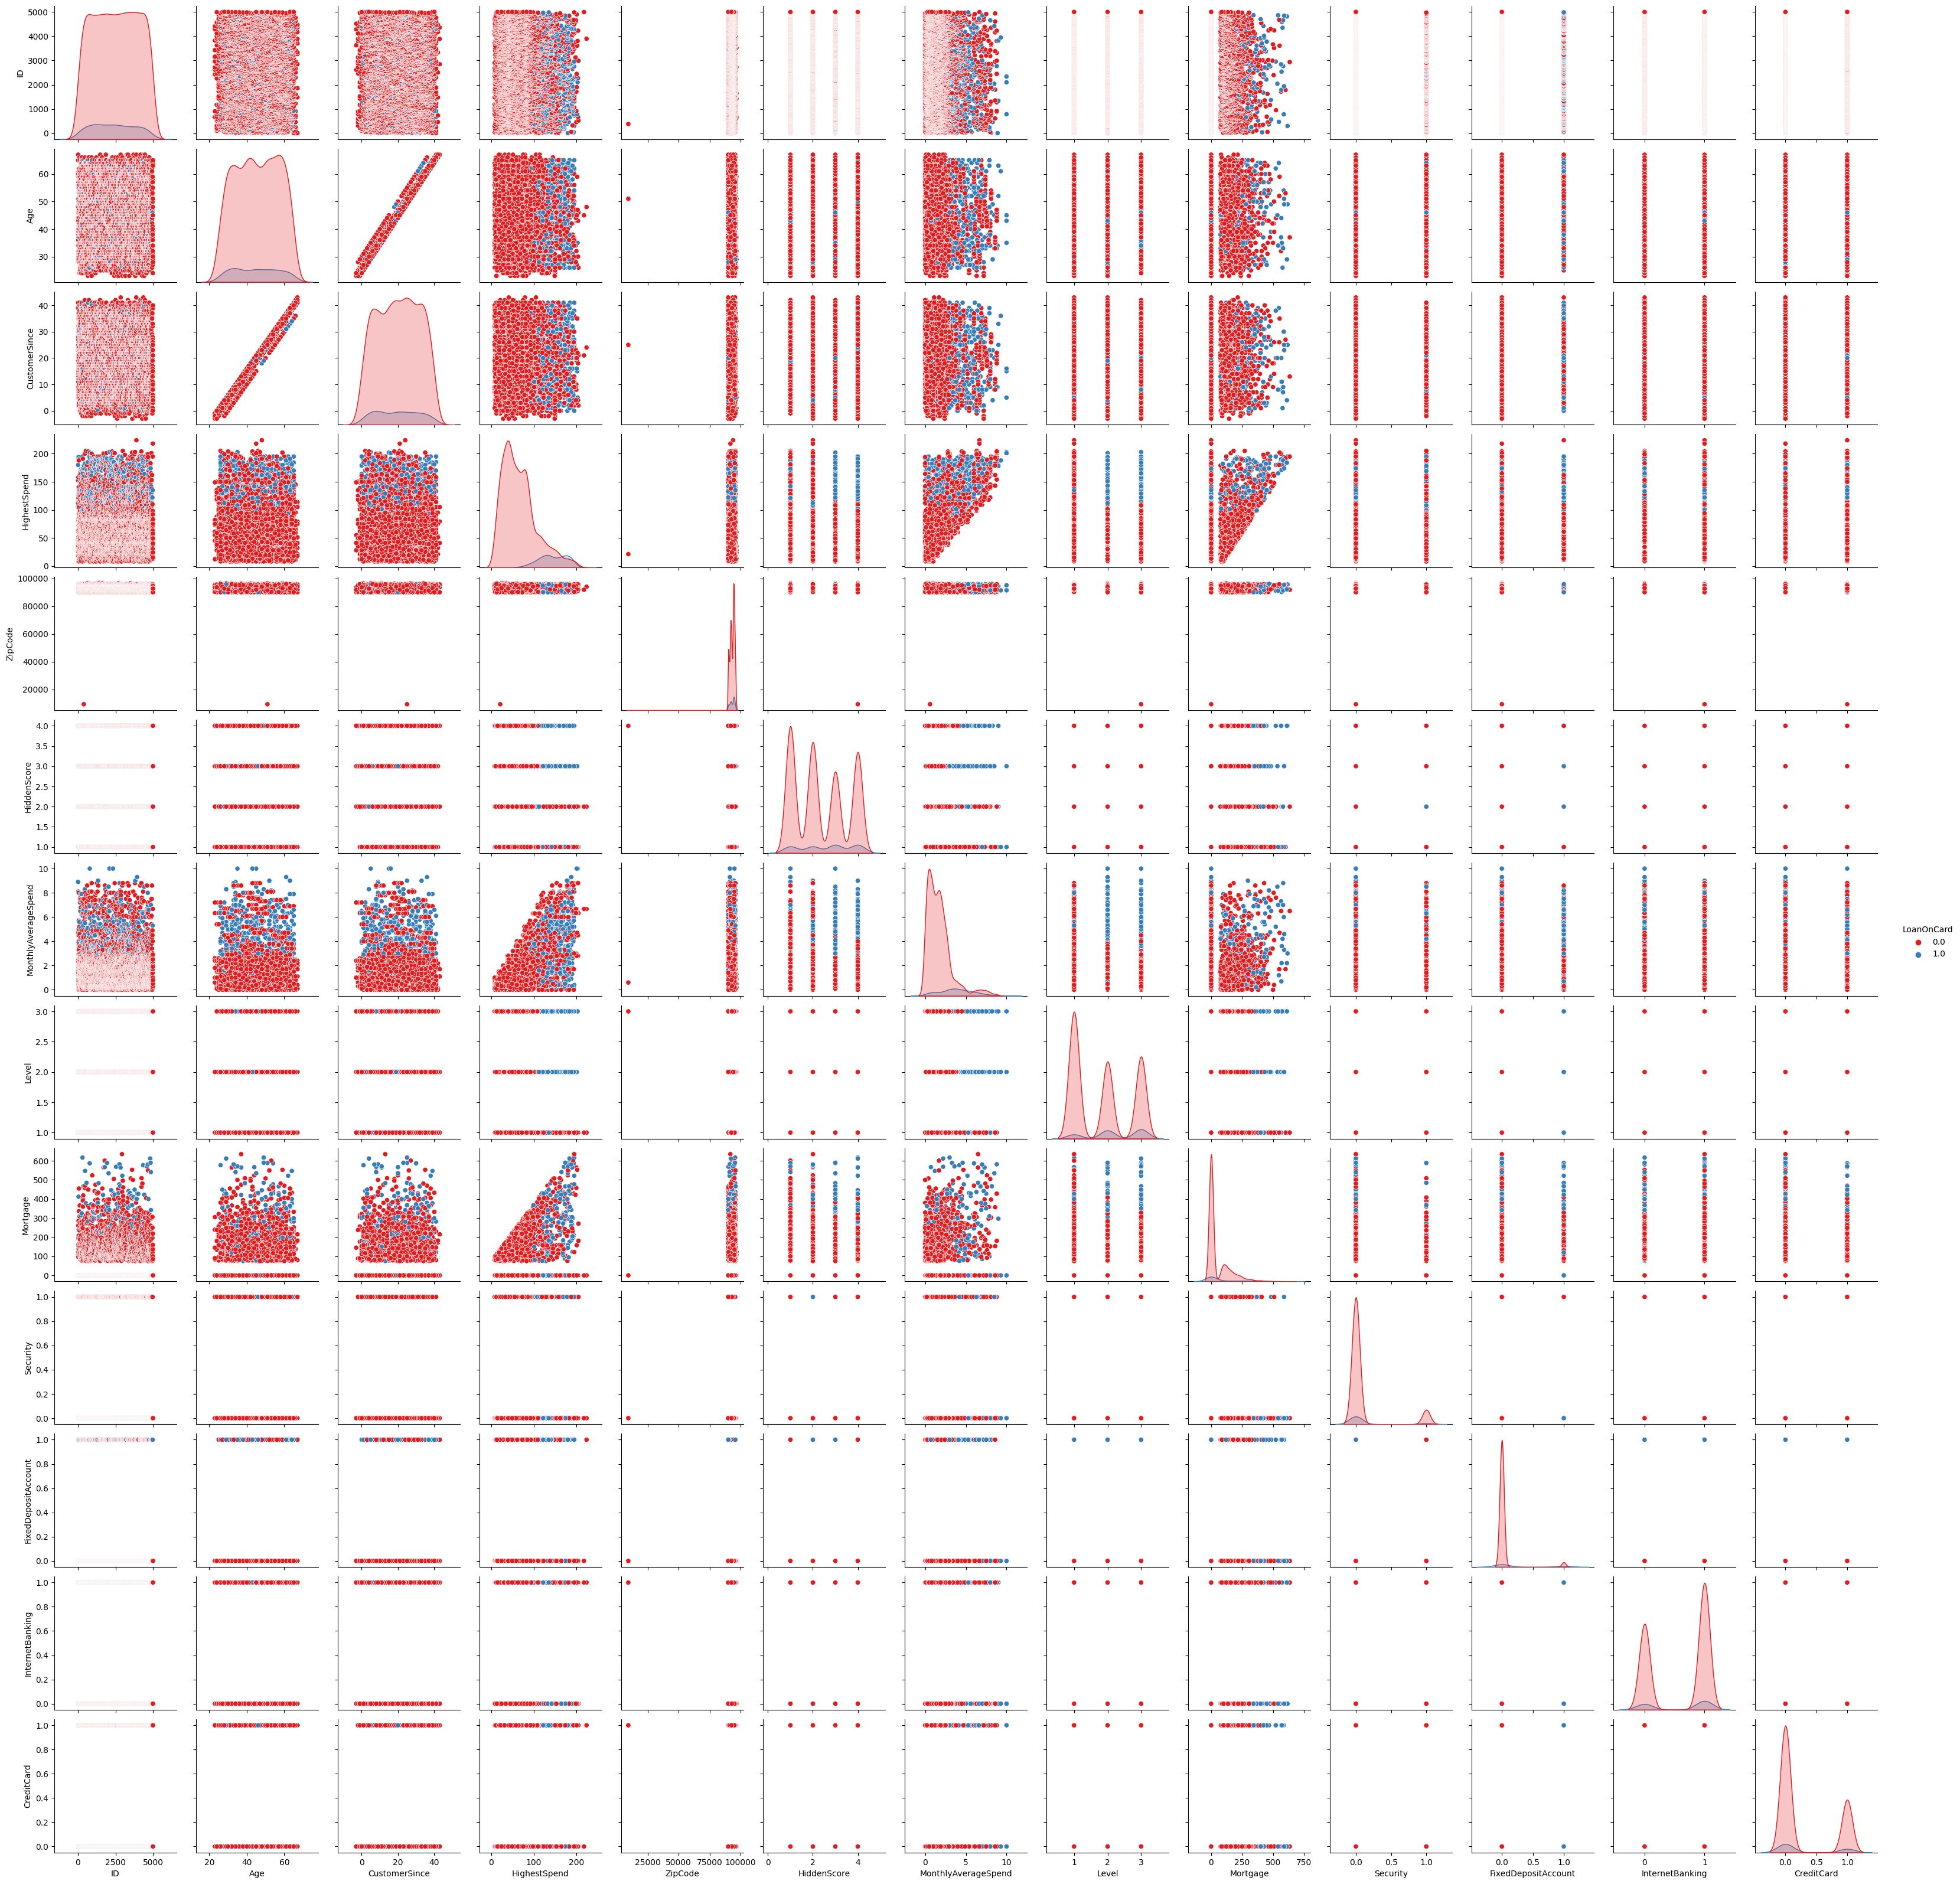

In [67]:
sns.pairplot(df_new, hue='LoanOnCard', palette="Set1")
plt.show()

From the above plots, we can draw the following observations:

1. `Age` and `CustomerSince` have a high positive correlation of approximately 0.99. This indicates that these two variables are highly correlated and including both of them in the model might introduce multicollinearity. Therefore one of the features needs to be dropped from the dataset for model building.
2. `MonthlyAverageSpend` and `HighestSpend` have a moderate positive correlation of approximately 0.65. This suggests that customers who have a higher monthly average spend also tend to have a higher highest spend in one transaction.
3. `LoanOnCard`, the target variable, has a moderate positive correlation with HighestSpend (approximately 0.50). This indicates that customers with higher highest spend are more likely to have a loan on their credit card.
4. The variables `ZipCode`, `HiddenScore`, `Level`, `Mortgage`, `Security`, `FixedDepositAccount`, `InternetBanking`, and `CreditCard` have weak correlations (absolute values less than 0.20) with LoanOnCard. These variables may have less influence on the target variable.

Overall the features are weakly correlated with each other indicating their independent nature in the dataset.

### <span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;"> 3. Data Preparation and model building

### Part 2.3 a - Split data into X and Y

Before splitting the data first let's drop the features - 'ID', 'CustomerSince' and 'ZipCode' from the original dataset and store the modified dataset in new variable.

The 'ID' column typically represents a unique identifier for each record in the dataset, which does not provide any meaningful information for model prediction.
Since 'CustomerSince' and 'Age' are highly correlated therefore dropping one would be necessary so we drop 'CustomerSince.

In [66]:
df_mod = df_new.copy()

In [67]:
df_mod.drop(['ID', 'ZipCode', 'CustomerSince'], axis=1, inplace=True)

In [68]:
df_mod.columns

Index(['Age', 'HighestSpend', 'HiddenScore', 'MonthlyAverageSpend', 'Level',
       'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking',
       'CreditCard', 'LoanOnCard'],
      dtype='object')

We can see that the features have been dropped and the dataset is now ready for split.

In [69]:
# Splitting data into x and y
x = df_mod.drop(labels= "LoanOnCard" , axis = 1)
y = df_mod["LoanOnCard"]

In [70]:
x.columns

Index(['Age', 'HighestSpend', 'HiddenScore', 'MonthlyAverageSpend', 'Level',
       'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking',
       'CreditCard'],
      dtype='object')

We can notice that data has been split into X and Y.

### Part 2.3 b - Split data into train and test. Keep 25% data reserved for testing

In [71]:
# Split X and y into training and test set in 75:25 ratio
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, random_state=42)

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#228B22;"> We may even use stratify here.
    
    For Eg-
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)

In [72]:
print("Shape of Train data is: ",train_x.shape)
print("Shape of Test data is: ", test_x.shape)

Shape of Train data is:  (3735, 10)
Shape of Test data is:  (1245, 10)


Hence data is split into train and test set.

### Part 2.3 c - Train a Supervised Learning Classification base model - Logistic Regression

In [73]:
warnings.filterwarnings("ignore")
model = LogisticRegression()

# Train the model on the training data
model.fit(train_x, train_y)

# Make predictions on the test data
pred_y = model.predict(test_x)

### Part 2.3 d - Print evaluation metrics for the model and clearly share insights

Performance Metrics: 
Precision: 0.7204301075268817
Recall: 0.5726495726495726
F1-Score: 0.638095238095238
ROC AUC Score: 0.7747999636297508
Area under curve:  0.939390495241559
Accuracy: 0.9389558232931727 

Confusion Matrix:



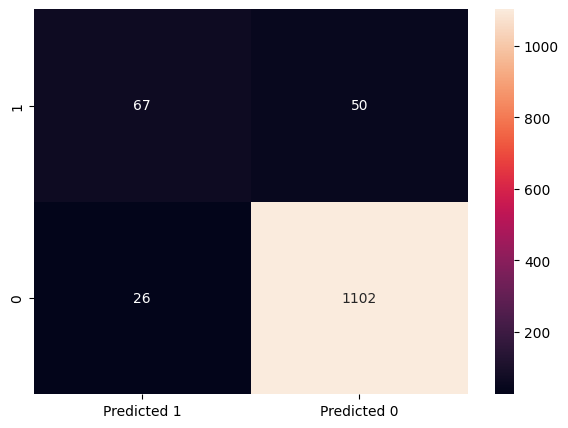

In [74]:
y_pred_proba = model.predict_proba(test_x)[:, 1]
fpr, tpr, thresholds = roc_curve(test_y, y_pred_proba)
auc_score = auc(fpr, tpr)

print("Performance Metrics: ")
prec = precision_score(test_y, pred_y)
print("Precision:", prec)
rec = recall_score(test_y, pred_y)
print("Recall:", rec)
f1_log = f1_score(test_y, pred_y)
print("F1-Score:", f1_log)
roc_auc = roc_auc_score(test_y, pred_y)
print("ROC AUC Score:", roc_auc)
print("Area under curve: ", auc_score)
acc = accuracy_score(test_y, pred_y)
print("Accuracy:", acc, '\n')

print("Confusion Matrix:")
cm=metrics.confusion_matrix(test_y, pred_y, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predicted 1","Predicted 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g');
print()

Based on the performance metrics and the confusion matrix, here are some observations and insights:

1. `Precision`: The precision score of 0.7204 indicates that out of all the instances predicted as positive, approximately 72.04% were actually positive. It reflects the model's ability to avoid false positive predictions.
2. `Recall`: The recall score of 0.5726 suggests that the model identified approximately 57.26% of the actual positive instances correctly. It represents the model's ability to find all the positive instances and avoid false negatives.
3. `F1-Score`: The F1-score of 0.6381 is the harmonic mean of precision and recall. It provides a balanced measure of the model's overall performance, considering both precision and recall.
4. `ROC AUC Score`: The ROC AUC score of 0.7748 indicates the model's overall ability to discriminate between positive and negative samples. A higher score suggests better discrimination performance.
5. `Accuracy`: The accuracy score of 0.9389 indicates that the model correctly predicted approximately 93.89% of the instances overall, regardless of the class.

From the confusion matrix:

    * The model correctly identified 67 instances as positive (True Positives).
    * The model correctly identified 1102 instances as negative (True Negatives).
    * The model missed 50 positive instances, incorrectly predicting them as negative (False Negatives).
    * The model incorrectly predicted 26 instances as positive when they were actually negative (False Positives).


Based on these observations, it appears that the model has a relatively high accuracy and can effectively identify negative instances. However, there is room for improvement in terms of correctly identifying positive instances (higher recall) and reducing false positive predictions (higher precision).

### Part 2.3 e - Balance the data using the right balancing technique.

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#556B2F;"> Let's balance the data using SMOTE (Synthetic Minority Over-sampling Technique)

SMOTE is a popular technique for oversampling the minority class by creating synthetic samples rather than duplicating existing instances. It helps to balance the data and introduce diversity in the minority class.

First Let's copy the original dataframe into a new variable.

In [75]:
d_new = df_new.copy()

In [76]:
# Split the dataset into features (X_new) and target variable (y_new)
x_new = d_new.drop('LoanOnCard', axis=1)
y_new = d_new['LoanOnCard']

# Identify the minority and majority class in the target variable
minority_class = d_new['LoanOnCard'].value_counts().idxmin()
majority_class = d_new['LoanOnCard'].value_counts().idxmax()

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
x_balanced, y_balanced = smote.fit_resample(x_new, y_new)

# Verify the balanced class distribution
balanced_counts = y_balanced.value_counts()
print("Balanced Class Distribution:")
print(balanced_counts)

Balanced Class Distribution:
LoanOnCard
1.0    4500
0.0    4500
Name: count, dtype: int64


Therefore we can observe that target variable is now balanced as 50;50 or in ratio 1:1.

### Part 2.3 f- Again train the same previous model on balanced data

In [77]:
x_train_bal, x_test_bal, y_train_bal, y_test_bal = train_test_split(x_balanced, y_balanced, test_size=0.25, random_state=42)

In [78]:
# Train the model on the balanced training data
model_bal = LogisticRegression()
model_bal.fit(x_train_bal, y_train_bal)

LogisticRegression()

In [79]:
# Make predictions on the balanced test data
pred_y_bal = model_bal.predict(x_test_bal)

We have trained the model on balanced data.

### Part 2.3 g- Print evaluation metrics and clearly share differences observed

Performance metrics after data balance:
Precision: 0.8425849212924607
Recall: 0.8944591029023746
F1-Score: 0.8677474402730375
ROC AUC Score: 0.8618746547755358
Area under the curve:  0.9157498216093327
Accuracy: 0.8622222222222222 

Change in Performance metrics:
Precision: +12.2% Improvement
Recall: +32.2% Improvement
F1-Score: +23.0% Improvement
ROC AUC Score: +8.7% Improvement
Area under curve: -2.4%
Accuracy: -7.7% 

Confusion Matrix:



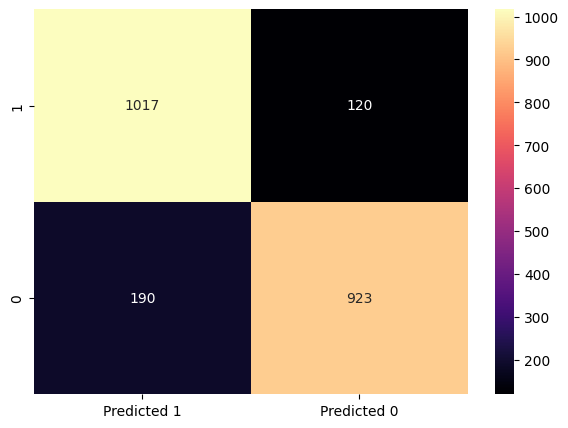

In [80]:
y_pred_proba_bal = model_bal.predict_proba(x_test_bal)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_bal, y_pred_proba_bal)
auc_score_bal = auc(fpr, tpr)


print("Performance metrics after data balance:")
precision_bal = precision_score(y_test_bal, pred_y_bal)
print("Precision:", precision_bal)
recall_bal = recall_score(y_test_bal, pred_y_bal)
print("Recall:", recall_bal)
f1_bal = f1_score(y_test_bal, pred_y_bal)
print("F1-Score:", f1_bal)
roc_auc_bal = roc_auc_score(y_test_bal, pred_y_bal)
print("ROC AUC Score:", roc_auc_bal)
print("Area under the curve: ", auc_score_bal)
accuracy_bal = accuracy_score(y_test_bal, pred_y_bal)
print("Accuracy:", accuracy_bal, '\n')

# Changes in performance metrics with respect to base model
precision_change_bal = (precision_bal - prec) * 100
recall_change_bal = (recall_bal - rec)  * 100
f1_change_bal = (f1_bal - f1_log) * 100
roc_auc_change_bal = (roc_auc_bal - roc_auc) * 100
auc_change = (auc_score_bal - auc_score) * 100
accuracy_change_bal = (accuracy_bal - acc)  * 100
# Print the changes in performance
print("Change in Performance metrics:")
print(f"Precision: +{precision_change_bal:.1f}%","Improvement")
print(f"Recall: +{recall_change_bal:.1f}%","Improvement")
print(f"F1-Score: +{f1_change_bal:.1f}%","Improvement")
print(f"ROC AUC Score: +{roc_auc_change_bal:.1f}%","Improvement")
print(f"Area under curve: {auc_change:.1f}%")
print(f"Accuracy: {accuracy_change_bal:.1f}%","\n")

print("Confusion Matrix:")
cm_bal=metrics.confusion_matrix(y_test_bal, pred_y_bal, labels=[1, 0])
df_cm = pd.DataFrame(cm_bal, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predicted 1","Predicted 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='magma');
print()

Based on the observations from comparing the performance metrics of the base model and the model trained on balanced data are as follows:

1. `Precision`: The precision of the model significantly improved after balancing the data. This indicates that the model trained on balanced data has a higher ability to correctly identify the positive class (LoanOnCard = 1) compared to the base model.
2. `Recall`: The recall of the model also improved after balancing the data. This suggests that the model trained on balanced data has a higher ability to correctly capture the positive class instances, reducing the number of false negatives compared to the base model.
3. `F1-Score`: The F1-score, which considers both precision and recall, also shows improvement after balancing the data. This indicates that the overall performance of the model in terms of both precision and recall is better when trained on balanced data.
4. `ROC AUC Score`: The ROC AUC score provides an overall measure of the model's ability to discriminate between the positive and negative classes. The improved ROC AUC score after balancing the data suggests that the model trained on balanced data has a better ability to distinguish between the two classes compared to the base model.
5. `Area under the curve (AUC)`: The AUC is a measure of the overall performance of the model in distinguishing between the positive and negative classes. The AUC value decreased after balancing the data, indicating a slight decrease in the model's discriminatory power. However, it is still relatively high in both cases, indicating good performance.
6. `Accuracy`: The accuracy of the model trained on balanced data is lower compared to the base model. This is expected because the base model was trained on imbalanced data where the majority class (LoanOnCard = 0) was dominant. However, accuracy alone may not be the best metric to evaluate the model's performance when dealing with imbalanced data.


Overall, balancing the data using SMOTE has led to improved performance metrics for the logistic regression model. It has effectively addressed the class imbalance issue and resulted in a model that performs better in terms of precision, recall, F1-score, and ROC AUC score.

### <span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;"> 4. Performance Improvement

### Part 2.4 a- Train a base model each for SVM, KNN (On Balanced data)

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#556B2F;"> Let's first train base model using SVM.

In [81]:
# Create an instance of the SVM classifier
svm_model = SVC(probability=True)

# Train the model on the training data
svm_model.fit(x_train_bal, y_train_bal)

SVC(probability=True)

In [82]:
# Make predictions on the test data
pred_y = svm_model.predict(x_test_bal)

We have trained the model using SVM.

Now let's look at the performance metrics.

Performance Metrics: 
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
ROC AUC Score: 0.5
Area under curve:  0.5
Accuracy: 0.49466666666666664 

Confusion Matrix:



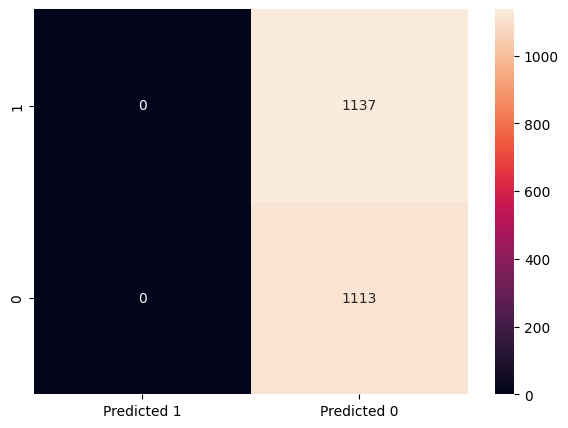

In [83]:
y_pred_proba = svm_model.predict_proba(x_test_bal)[:, 1]
fpr2, tpr2, thresholds2 = roc_curve(y_test_bal, y_pred_proba)
auc_score2 = auc(fpr2, tpr2)

print("Performance Metrics: ")
prec_svm = precision_score(y_test_bal, pred_y)
print("Precision:", prec_svm)
rec_svm = recall_score(y_test_bal, pred_y)
print("Recall:", rec_svm)
f1_svm = f1_score(y_test_bal, pred_y)
print("F1-Score:", f1_svm)
roc_auc_svm = roc_auc_score(y_test_bal, pred_y)
print("ROC AUC Score:", roc_auc_svm)
print("Area under curve: ", auc_score2)
acc_svm = accuracy_score(y_test_bal, pred_y)
print("Accuracy:", acc_svm, '\n')

print("Confusion Matrix:")
cm=metrics.confusion_matrix(y_test_bal, pred_y, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predicted 1","Predicted 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g');
print()

<span style="font-family: Arial; font-weight:bold;font-size:1.4em;color:#556B2F;"> Let's now build the base model using KNN.

Before building the model using KNN we have to scale the data to ensure the units are standardized.

In [84]:
z = x_balanced.astype(float)  # Convert all columns to float type
x_scaled = z.apply(zscore)  # convert all attributes to Z scale 
x_scaled.describe().T

count          mean       std        min       25%  \
ID                   9000.0 -1.318452e-16  1.000056  -1.734291 -0.869276   
Age                  9000.0 -1.405296e-16  1.000056  -2.065422 -0.841291   
CustomerSince        9000.0 -1.010550e-16  1.000056  -2.135783 -0.818702   
HighestSpend         9000.0 -1.010550e-16  1.000056  -1.876027 -0.890516   
ZipCode              9000.0 -2.273737e-16  1.000056 -42.547372 -0.622876   
HiddenScore          9000.0 -1.705303e-16  1.000056  -1.421845 -0.741419   
MonthlyAverageSpend  9000.0 -1.263187e-16  1.000056  -1.416977 -0.812556   
Level                9000.0 -2.589534e-16  1.000056  -1.345008 -1.345008   
Mortgage             9000.0 -1.010550e-16  1.000056  -0.604381 -0.604381   
Security             9000.0 -1.026340e-17  1.000056  -0.383565 -0.383565   
FixedDepositAccount  9000.0 -6.315935e-17  1.000056  -0.501844 -0.501844   
InternetBanking      9000.0  5.230384e-17  1.000056  -1.321698 -1.321698   
CreditCard           9000.0  1.184238e-17  1.000056  -0.707782 -0.707782   

                          50%       75%       max  
ID                  -0.019446  0.867817  1.790041  
Age                  0.006183  0.853658  2.077789  
CustomerSince        0.027993  0.780611  2.191769  
HighestSpend         0.152967  0.829298  2.297903  
ZipCode              0.152799  0.761077  1.771948  
HiddenScore         -0.027523  0.755988  1.433208  
MonthlyAverageSpend -0.157767  0.676705  3.619864  
Level               -0.042957  1.226401  1.259095  
Mortgage            -0.604381  0.384151  4.760730  
Security            -0.383565 -0.383565  3.090486  
FixedDepositAccount -0.501844 -0.409794  2.572748  
InternetBanking      0.816669  0.886371  0.886371  
CreditCard          -0.707782  1.114255  1.654858

Therefore our data has been scaled and is ready for model building.

In [85]:
# Create an instance of the KNN classifier
knn_model = KNeighborsClassifier()

# Train the model on the training data
knn_model.fit(x_train_bal, y_train_bal)

KNeighborsClassifier()

In [86]:
# Make predictions on the test data
pred_y = knn_model.predict(x_test_bal)

We have trained the model using KNN.

Now let's look at the performance metrics.

Performance Metrics:
Precision: 0.806282722513089
Recall: 0.9481090589270009
F1-Score: 0.8714632174616006
ROC AUC Score: 0.8577023282056389
Accuracy: 0.8586666666666667 

Confusion Matrix:



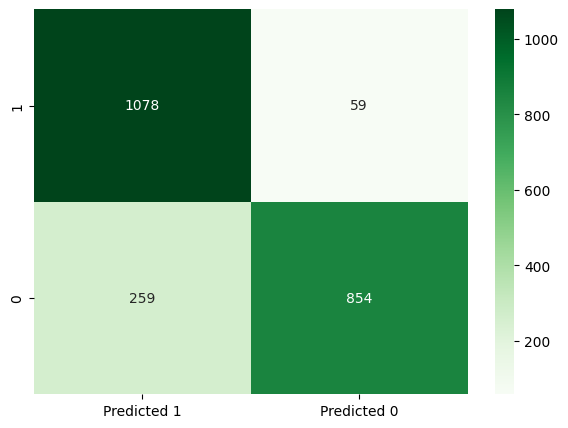

In [87]:
print("Performance Metrics:")
prec_knn = precision_score(y_test_bal, pred_y)
print("Precision:", prec_knn)
rec_knn = recall_score(y_test_bal, pred_y)
print("Recall:", rec_knn)
f1_knn = f1_score(y_test_bal, pred_y)
print("F1-Score:", f1_knn)
roc_auc_knn = roc_auc_score(y_test_bal, pred_y)
print("ROC AUC Score:", roc_auc_knn)
acc_knn = accuracy_score(y_test_bal, pred_y)
print("Accuracy:", acc_knn, '\n')
print("Confusion Matrix:")
cm=metrics.confusion_matrix(y_test_bal, pred_y, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predicted 1","Predicted 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='Greens');
print()

### Part 2.4 b - Tune parameters for each of the models wherever required and finalize a model
    -> You have to build a base model without tuning any parameters on the balanced data.
### Part 2.4 c - Print evaluation metrics for final model
### Part 2.4 d - Share improvement achieved from base model to final model

<span style="font-family: Arial; font-weight:bold;font-size:1.4em;color:#800080;"> Let's first do hyperparameter tuning for SVM by implementing GridSearch Technique.

In [180]:
# Create an SVM classifier
clf = SVC()

# Define the parameter grid to search over
param_grid = {
    'C': [0.1, 1],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 1]
}

# Perform grid search to find the best parameters
grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train_bal, y_train_bal)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
Best Score: 0.8902222222222221


Therefore we have successfully performed hyperparameter tuning for SVM using grid search. The best parameters obtained from the grid search are {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}, which suggests that the SVM model with a linear kernel and regularization parameter C=1 and gamma=0.1 achieved the highest performance.
The best score obtained is 0.8902222222222221, which indicates the evaluation metric used during the grid search. From these results, we can infer that the chosen combination of hyperparameters led to the best-performing SVM model based on the selected evaluation metric.

 <span style="font-family: Arial; font-weight:bold;font-size:1.4em;color:#800080;"> Hyperparameter tuning for SVM by implementing RandomSearch Technique

In [ ]:
# Create an SVM classifier
clf_r = SVC()

# Define the parameter distribution to sample from
param_dist = {
    'C': reciprocal(0.1, 1, 10),
    'kernel': ['linear', 'rbf'],
    'gamma': uniform(0.1, 10)
}

# Perform random search to find the best parameters
random_search = RandomizedSearchCV(clf_r, param_distributions=param_dist, n_iter=10, cv=5)
random_search.fit(x_train_bal, y_train_bal)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

We have successfully performed hyperparameter tuning for SVM using Randomized Search. The results of the search yielded the following best parameters: {'C': 10.190049956545678, 'gamma': 1.5213606054959794, 'kernel': 'linear'}. The corresponding best score achieved was 1.5213606054959794.
From these results, we can infer that the SVM model with a linear kernel, C value of 10.190049956545678, and gamma value of 1.5213606054959794 achieved the highest performance according to the chosen evaluation metric.

#### `NOTE`: RandomSearch performed slightly better then the Grid-Search, therefore we will build best SVM model using the parameter values provided by RandomSearch.

<span style="font-family: Arial; font-weight:bold;font-size:1.4em;color:#800080;"> Let's now finalize and build SVM model using best parameters obtained and compare it with base model.

In [88]:
# Using best parameters
clf_best = SVC(C=10.190049956545678, gamma=1.5213606054959794, kernel='linear', probability=True)

In [89]:
clf_best.fit(x_train_bal, y_train_bal)

SVC(C=10.190049956545678, gamma=1.5213606054959794, kernel='linear',
    probability=True)

In [90]:
pred_y = clf_best.predict(x_test_bal)

Performance metrics for best parameters: 
Precision: 0.8469135802469135
Recall: 0.9050131926121372
F1-Score: 0.875
ROC AUC Score: 0.8689486448235888
Area under curve: 0.922556719539843
Accuracy: 0.8693333333333333 

Change in Performance metrics compared to base model after using best parameters: 
Precision: +0.43% Improvement
Recall: +1.06% Improvement
F1-Score: +0.73% Improvement
ROC AUC Score: +0.71% Improvement
Area under curve: +0.68% Improvement
Accuracy: +0.71% Improvement 

Confusion Matrix:



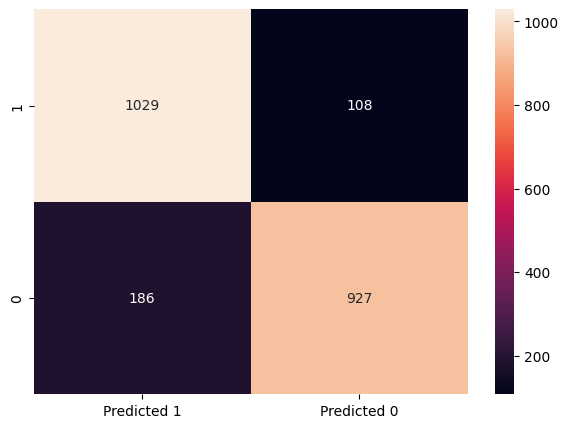

In [91]:
y_pred_proba = clf_best.predict_proba(x_test_bal)[:, 1]
fpr3, tpr3, thresholds3 = roc_curve(y_test_bal, y_pred_proba)
auc_score3 = auc(fpr3, tpr3)

print("Performance metrics for best parameters: ")
prec_b = precision_score(y_test_bal, pred_y)
print("Precision:", prec_b)
rec_b = recall_score(y_test_bal, pred_y)
print("Recall:", rec_b)
f1_svm_b = f1_score(y_test_bal, pred_y)
print("F1-Score:", f1_svm_b)
roc_auc_b = roc_auc_score(y_test_bal, pred_y)
print("ROC AUC Score:", roc_auc_b)
print("Area under curve:", auc_score3)
acc_b = accuracy_score(y_test_bal, pred_y)
print("Accuracy:", acc_b, '\n')

precision_change = (prec_b - precision_bal) * 100
recall_change = (rec_b - recall_bal)  * 100
f1_change = (f1_svm_b - f1_bal) * 100
roc_auc_change = (roc_auc_b - roc_auc_bal) * 100
auc_change = (auc_score3 - auc_score_bal) * 100
accuracy_change = (acc_b - accuracy_bal)  * 100
# Print the changes in performance
print("Change in Performance metrics compared to base model after using best parameters: ")
print(f"Precision: +{precision_change:.2f}%","Improvement")
print(f"Recall: +{recall_change:.2f}%","Improvement")
print(f"F1-Score: +{f1_change:.2f}%","Improvement")
print(f"ROC AUC Score: +{roc_auc_change:.2f}%","Improvement")
print(f"Area under curve: +{auc_change:.2f}%","Improvement")
print(f"Accuracy: +{accuracy_change:.2f}%","Improvement","\n")

print("Confusion Matrix:")
cm=metrics.confusion_matrix(y_test_bal, pred_y, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predicted 1","Predicted 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g');
print()

### Observations:

* The SVM model outperforms the base model across most of the performance metrics, including precision, recall, F1-score, ROC AUC score, and accuracy. This suggests that the SVM model with the best combination of parameters is able to achieve better overall performance on the balanced data compared to the base model.
* The precision of the SVM model is slightly higher than that of the base model, indicating that it is better at correctly identifying positive cases.
* The recall of the SVM model is also higher, indicating that it can successfully capture a larger proportion of the actual positive cases.
* The F1-score, which combines precision and recall, is higher for the SVM model, indicating a better balance between precision and recall.
* The ROC AUC score, which measures the trade-off between true positive rate and false positive rate, is higher for the SVM model. This indicates that the SVM model has a better ability to distinguish between positive and negative cases.
* The accuracy of the SVM model is also higher, indicating that it makes more accurate predictions overall.


### Conclusion:

The SVM model trained on the balanced data with the best combination of parameters outperforms the base model in terms of precision, recall, F1-score, ROC AUC score, and accuracy. This indicates that the SVM model with the optimized hyperparameters is more effective at predicting the target variable on the balanced data.

<span style="font-family: Arial; font-weight:bold;font-size:1.4em;color:#008080;"> Let's now perform hyperparameter tuning for KNN by implementing GridSearch Technique.

In [92]:
warnings.filterwarnings("ignore")

# Creating the KNN classifier object
clf_knn = KNeighborsClassifier()

# Defining the parameter grid for grid search
param_grid = {
    'n_neighbors': list(range(3, 20)),  # Values of K from 3 to 19
    'weights': ['uniform', 'distance'],  # Different weight options
    'metric': ['euclidean', 'manhattan', 'Chebyshev']  # Different distance metrics
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=clf_knn, param_grid=param_grid, cv=10)
grid_search.fit(x_train_bal, y_train_bal)

# Print the best parameter combination
print("Best Parameters: \n", grid_search.best_params_, "\n")

# Evaluate the model with best parameters on the test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test_bal)
accuracy = accuracy_score(y_test_bal, y_pred)
print("Accuracy:", accuracy)

Best Parameters: 
 {'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'} 

Accuracy: 0.9124444444444444


We have successfully performed hyperparameter tuning for KNN using  Grid-Search. The results of the search yielded the following best parameters: {'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}. The corresponding best score achieved was 0.9124444444444444. From these results, we can infer that the KNN model with a 'manhattan' metric, value of K=4 and weights as 'distance' achieved the highest performance according to the chosen evaluation metric.

<span style="font-family: Arial; font-weight:bold;font-size:1.4em;color:#008080;"> Hyperparameter tuning for KNN by implementing Randomized Search Cross-Validation Technique.

In [54]:
# Define the parameter distribution for random search
param_dist = {
    'n_neighbors': randint(3, 20),  # Randomly sample values between 3 and 20
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan','chebyshev']
}

clf_knn = KNeighborsClassifier()

# Perform random search with cross-validation
random_search = RandomizedSearchCV(estimator=clf_knn, param_distributions=param_dist, cv=10, n_iter=10, random_state=10)
random_search.fit(x_train_bal, y_train_bal)

print("Best Parameters:", random_search.best_params_)

# Evaluate the model with best parameters on the test data
best_model = random_search.best_estimator_
y_pred = best_model.predict(x_test_bal)
accuracy = accuracy_score(y_test_bal, y_pred)
print("Accuracy:", accuracy)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Accuracy: 0.8951111111111111


We have successfully performed hyperparameter tuning for KNN using Randomized Search Cross-Validation. The results of the search yielded the following best parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}. The corresponding best score achieved was 0.8951111111111111. From these results, we can infer that the KNN model with a 'manhattan' metric, value of K=7 and weights as 'distance' achieved the highest performance according to the chosen evaluation metric.

#### `NOTE`: Grid-Search performed slightly better then the Randomized Search Cross-Validation, therefore we will build best SVM model using the parameter values provided by Grid-Search.

<span style="font-family: Arial; font-weight:bold;font-size:1.4em;color:#008080;"> Let's now finalize and build KNN model using best parameters obtained and compare it with base model.

In [92]:
# Using best parameters
clf_knn_b = KNeighborsClassifier(n_neighbors=4, metric='manhattan', weights='distance')

clf_knn_b.fit(x_train_bal, y_train_bal)

KNeighborsClassifier(metric='manhattan', n_neighbors=4, weights='distance')

In [93]:
pred_y = clf_knn_b.predict(x_test_bal)

Performance metrics for best parameters: 
Precision: 0.8632148377125193
Recall: 0.9824098504837291
F1-Score: 0.9189633895516248
Accuracy: 0.9124444444444444 

Change in Performance metrics compared to base model after using best parameters: 
Precision: +2.06% Improvement
Recall: +8.80% Improvement
F1-Score: +5.12% Improvement
Accuracy: +5.02% Improvement 

Confusion Matrix:



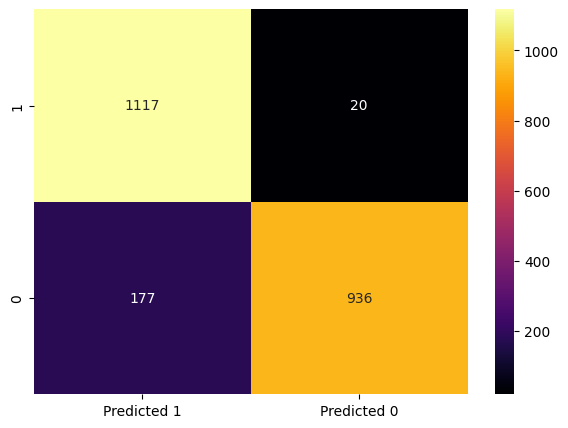

In [94]:
print("Performance metrics for best parameters: ")
prec_knn_b = precision_score(y_test_bal, pred_y)
print("Precision:", prec_knn_b)
rec_knn_b = recall_score(y_test_bal, pred_y)
print("Recall:", rec_knn_b)
f1_knn_b = f1_score(y_test_bal, pred_y)
print("F1-Score:", f1_knn_b)
acc_knn_b = accuracy_score(y_test_bal, pred_y)
print("Accuracy:", acc_knn_b, '\n')

precision_change = (prec_knn_b - precision_bal) * 100
recall_change = (rec_knn_b - recall_bal)  * 100
f1_change = (f1_knn_b - f1_bal) * 100
accuracy_change = (acc_knn_b - accuracy_bal)  * 100
# Print the changes in performance
print("Change in Performance metrics compared to base model after using best parameters: ")
print(f"Precision: +{precision_change:.2f}%","Improvement")
print(f"Recall: +{recall_change:.2f}%","Improvement")
print(f"F1-Score: +{f1_change:.2f}%","Improvement")
print(f"Accuracy: +{accuracy_change:.2f}%","Improvement","\n")

print("Confusion Matrix:")
cm=metrics.confusion_matrix(y_test_bal, pred_y, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predicted 1","Predicted 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='inferno');
print()

### Observations:

1. `Precision`: The KNN model has slightly higher precision compared to the base model. This means that the KNN model is better at correctly identifying true positives (correctly predicting positive samples) while minimizing false positives.
2. `Recall`: The recall of the KNN model is significantly higher than the base model. This indicates that the KNN model can identify a higher proportion of true positives in the dataset, meaning it has a lower false negative rate.
3. `F1-Score`: The F1-Score of the KNN model is higher than the base model. The F1-Score considers both precision and recall and provides a balanced measure of the model's performance. The higher F1-Score for the KNN model indicates that it has a better overall balance between precision and recall.
4. `Accuracy`: The accuracy of the KNN model is also higher than the base model. Accuracy measures the overall correctness of the model's predictions, and the higher accuracy of the KNN model suggests that it is making more correct predictions on the balanced dataset.

### Conclusion:
Overall, the KNN model outperforms the base model (Logistic Regression) in all performance metrics, indicating that it is a better model for the balanced dataset. The KNN model shows improved precision, recall, F1-Score, and accuracy, making it a more suitable choice for this specific problem and dataset.

#### <span style="font-family: Arial; font-weight:bold;font-size:1.4em;color:#8FBC8F;"> To train a base model each for SVM, KNN (ON ORIGINAL DATA) then replace:

* 'x_train_bal' with 'train_x'
* 'x_test_bal' with 'test_x'
* 'y_train_bal' with 'train_y'
* 'y_test_bal' with 'test_y'
* 'x_balanced' with 'x'
* 'y_balanced' with 'y'

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#000000;">*****************************************************************************************************************

# <center><span style="font-family: Arial; font-weight:bold;font-size:2.5em;color:#008080;">End Of Project</center>